In [34]:
Dir="C:\\Users\\chidimmpe\\Downloads"

This data was sourced from https://data.europa.eu/data/datasets/s2190_90_1_478_eng?locale=en. It contains an excel file with 73 sheets. it contains data from a wide range of issues but my focus is basically on those aimed at assessing te awareness level of antibiotics abuse among persons in the European Union (EU). 

I have to first load the necessary data analyses libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

The Excel file has to be loaded using  pandas' "ExcelFile" function

In [143]:
EU_antibiotics = pd.ExcelFile("EU_antibiotics_country.xls")
print(EU_antibiotics.sheet_names)

['Index', 'B2', 'Q1NAT', 'QC1', 'QC2', 'QC3', 'QC4', 'QC5.1', 'QC5.2', 'QC5.3', 'QC5.4', 'QC5.5', 'QC5R', 'QC6', 'QC7', 'QC8', 'QC9', 'QC10', 'QC11', 'QC12', 'QC13', 'QC14', 'QC15', 'D1.1', 'D1.2', 'D1.3', 'D7.1', 'D7.2', 'D7.3', 'D8', 'D10', 'D11', 'D112', 'D15a.1', 'D15a.2', 'C14', 'D15b.1', 'D15b.2', 'D25', 'D40a', 'D40b', 'D40c', 'D40R', 'D40', 'D43a', 'D43b', 'D43', 'D60', 'D62.1', 'D62.2', 'D62.3', 'D62.4', 'D62R', 'D63', 'D70', 'D79', 'D71.1', 'D71.2', 'D71.3', 'C1', 'C2', 'D72.1', 'D72.2', 'D72.3', 'D73.1', 'D73.2', 'D77', 'D78', 'D80a', 'D80b', 'D81', 'D82', 'D83']


Listed above are the titles of the varied excel sheets each addressing a unique question. As per custom, the "Index"  sheet should contain details of the content of the other files. So I will take a look at it

In [22]:
df= pd.read_excel(EU_antibiotics, "Index")
df.head(10)


B2'!A1                                             B Pays  \
0  Q1NAT'!A1  Q1NAT Quelle est votre nationalité ? Veuillez ...   
1    QC1'!A1  QC1 Avez-vous pris des antibiotiques par voie ...   
2    QC2'!A1  QC2 Comment avez-vous obtenu le dernier traite...   
3    QC3'!A1  QC3 Quelle était la raison pour laquelle vous ...   
4    QC4'!A1  QC4 Avez-vous fait un examen, tel qu'une prise...   
5  QC5.1'!A1  QC5.1 Pour chacune des propositions suivantes,...   
6  QC5.2'!A1  QC5.2 Pour chacune des propositions suivantes,...   
7  QC5.3'!A1  QC5.3 Pour chacune des propositions suivantes,...   
8  QC5.4'!A1  QC5.4 Pour chacune des propositions suivantes,...   
9  QC5.5'!A1  QC5.5 Pour chacune des propositions suivantes,...   

                                          Unnamed: 2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                  Les antibiotiques tuent les virus   
6  Les antibiotiques sont efficaces contre le rhume    
7  La prise inutile d’antibiotiques les rend inef...   
8  La prise d’antibiotiques a souvent des effets ...   
9                                            Moyenne   

                  Unnamed: 3  \
0                        NaN   
1      ('QUESTION SENSIBLE')   
2  (SI 'OUI', CODE 1 EN QC1)   
3  (SI 'OUI', CODE 1 EN QC1)   
4  (SI 'OUI', CODE 1 EN QC1)   
5                        NaN   
6                        NaN   
7                        NaN   
8                        NaN   
9                        NaN   

                                           B Country  \
0  Q1NAT What is your nationality? Please tell me...   
1  QC1 Have you taken any antibiotics orally such...   
2  QC2 How did you obtain the last course of anti...   
3  QC3 What was the reason for last taking the an...   
4  QC4 Did you have a test, for example a blood o...   
5  QC5.1 For each of the following statements, pl...   
6  QC5.2 For each of the following statements, pl...   
7  QC5.3 For each of the following statements, pl...   
8  QC5.4 For each of the following statements, pl...   
9  QC5.5 For each of the following statements, pl...   

                                          Unnamed: 5  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                           Antibiotics kill viruses   
6           Antibiotics are effective against colds    
7  Unnecessary use of antibiotics makes them beco...   
8  Taking antibiotics often has side-effects such...   
9                                            Average   

                  Unnamed: 6  
0                        NaN  
1     ('SENSITIVE QUESTION')  
2  (IF 'YES', CODE 1 IN QC1)  
3  (IF 'YES', CODE 1 IN QC1)  
4  (IF 'YES', CODE 1 IN QC1)  
5                        NaN  
6                        NaN  
7                        NaN  
8                        NaN  
9                        NaN

The column "B2'!A1" apparently contains the number tags to each question, the column "B Pays" contains the French translation of each question posed to the respondents. Certain questions are subdivided into versions like 5.1, 5.2 etc. Such subdivisions are contained in the column named "Unnamed:2". The "B Country" contains the English translation of the details of the subsequent excel sheets with "Unnamed:5" the English version of the subdivided questions.

Of interest to me are the questions, as they determine which of the sheets are relevant to me, thus I will need to print out the contents of the "B Country" column to help me determine which questions are of relevance to me

In [23]:
list(df["B Country"])

['Q1NAT What is your nationality? Please tell me the country(ies) that applies(y). MULTIPLE ANSWERS POSSIBLE',
 'QC1 Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? ',
 'QC2 How did you obtain the last course of antibiotics that you used? ',
 'QC3 What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)',
 'QC4 Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? ',
 'QC5.1 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.2 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.3 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.4 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.5 For each 

From the list above, it is clear that only questions 1 to 15 (DC1 - QC15) are relevant to antibiotics. I will limit my analyses to the few I think are most relevant to the answers I intend to find. 

The "B2" sheet  asks the question "What is your nationality". I need to take a good look at it as it will aid in tackling analyses of the subsequent sheets. 

In [24]:
Nationality = pd.read_excel(EU_antibiotics, "B2")
Nationality.head(20)

Index Unnamed: 1                 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0     NaN        NaN  VOLUME A Pondéré Weighted        NaN        NaN   
1     NaN     B Pays                        NaN        NaN        NaN   
2     NaN        NaN                        NaN        NaN        NaN   
3     NaN        NaN                        NaN        NaN        NaN   
4     NaN        NaN                        NaN        NaN        NaN   
5     NaN        NaN                        NaN        NaN        NaN   
6     NaN        NaN                        NaN        NaN        NaN   
7     NaN        NaN                 UE28\nEU28         BE         BG   
8     NaN      TOTAL                      27474       1018       1040   
9     NaN   BELGIQUE                        617       1018          0   
10    NaN        NaN                       0.02          1         -    
11    NaN    DANMARK                        308          0          0   
12    NaN        NaN                       0.01         -          -    
13    NaN     ELLADA                        633          0          0   
14    NaN        NaN                       0.02         -          -    
15    NaN     ESPANA                       2512          0          0   
16    NaN        NaN                       0.09         -          -    
17    NaN      SUOMI                        302          0          0   
18    NaN        NaN                       0.01         -          -    
19    NaN     FRANCE                       3445          0          0   

   Unnamed: 5 Eurobarometer 90.1 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0         NaN                NaN        NaN        NaN        NaN  ...   
1         NaN                NaN        NaN        NaN        NaN  ...   
2         NaN                NaN        NaN        NaN        NaN  ...   
3         NaN                NaN        NaN        NaN        NaN  ...   
4         NaN                NaN        NaN        NaN        NaN  ...   
5         NaN                NaN        NaN        NaN        NaN  ...   
6         NaN                NaN        NaN        NaN        NaN  ...   
7          CZ                 DK        D-W         DE        D-E  ...   
8        1012               1015       1006       1507        501  ...   
9           0                  0          0          0          0  ...   
10         -                  -          -          -          -   ...   
11          0               1015          0          0          0  ...   
12         -                   1         -          -          -   ...   
13          0                  0          0          0          0  ...   
14         -                  -          -          -          -   ...   
15          0                  0          0          0          0  ...   
16         -                  -          -          -          -   ...   
17          0                  0          0          0          0  ...   
18         -                  -          -          -          -   ...   
19          0                  0          0          0          0  ...   

   Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7           NL          AT          PL          PT          RO          SI   
8         1044        1007        1034        1016        1007        1018   
9            0           0           0           0           0           0   
10          -           -           -           -        

After a lot of pre_analyses and taking a look at the excel sheet, I can see that the relevant information  is contained from row number 8 thus I will be skipping all the rows before row 8. I will also drop the column "UE28\nEU28" as it gives the weighted number of the respondents which I do not consider relevant

In [25]:
Nationality= pd.read_excel(EU_antibiotics, "B2", skiprows = 7, header = [1])
#Drop the "UE28\nEU28" as it is not relevant to this analyses. It specifies the percentage of  respondents in the EU sample

Nationality= Nationality.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Nationality.rename(columns ={"Unnamed: 1":"Country"}, inplace = True)

Nationality.head(20)

Country    BE    BG    CZ    DK   D-W    DE  D-E    EE    IE  ...  \
0        TOTAL  1018  1040  1012  1015  1006  1507  501  1017  1001  ...   
1     BELGIQUE  1018     0     0     0     0     0    0     0     0  ...   
2          NaN     1    -     -     -     -     -    -     -     -   ...   
3      DANMARK     0     0     0  1015     0     0    0     0     0  ...   
4          NaN    -     -     -      1    -     -    -     -     -   ...   
5       ELLADA     0     0     0     0     0     0    0     0     0  ...   
6          NaN    -     -     -     -     -     -    -     -     -   ...   
7       ESPANA     0     0     0     0     0     0    0     0     0  ...   
8          NaN    -     -     -     -     -     -    -     -     -   ...   
9        SUOMI     0     0     0     0     0     0    0     0     0  ...   
10         NaN    -     -     -     -     -     -    -     -     -   ...   
11      FRANCE     0     0     0     0     0     0    0     0     0  ...   
12         NaN    -     -     -     -     -     -    -     -     -   ...   
13     IRELAND     0     0     0     0     0     0    0     0  1001  ...   
14         NaN    -     -     -     -     -     -    -     -      1  ...   
15      ITALIA     0     0     0     0     0     0    0     0     0  ...   
16         NaN    -     -     -     -     -     -    -     -     -   ...   
17  LUXEMBOURG     0     0     0     0     0     0    0     0     0  ...   
18         NaN    -     -     -     -     -     -    -     -     -   ...   
19   NEDERLAND     0     0     0     0     0     0    0     0     0  ...   

      NL    AT    PL    PT    RO    SI    SK    FI    SE    UK  
0   1044  1007  1034  1016  1007  1018  1042  1011  1011  1000  
1      0     0     0     0     0     0     0     0     0     0  
2     -     -     -     -     -     -     -     -     -     -   
3      0     0     0     0     0     0     0     0     0     0  
4     -     -     -     -     -     -     -     -     -     -   
5      0     0     0     0     0     0     0     0     0     0  
6     -     -     -     -     -     -     -     -     -     -   
7      0     0     0     0     0     0     0     0     0     0  
8     -     -     -     -     -     -     -     -     -     -   
9      0     0     0     0     0     0     0  1011     0     0  
10    -     -     -     -     -     -     -      1    -     -   
11     0     0     0     0     0     0     0     0     0     0  
12    -     -     -     -     -     -     -     -     -     -   
13     0     0     0     0     0     0     0     0     0     0  
14    -     -     -     -     -     -     -     -     -     -   
15     0     0     0     0     0     0     0     0     0     0  
16    -     -     -     -     -     -     -     -     -     -   
17     0     0     0     0     0     0     0     0     0     0  
18    -     -     -     -     -     -     -     -     -     -   
19  1044     0     0     0     0     0     0     0     0     0  

[20 rows x 31 columns]

Under each country name is a "NaN" row meant to contain the weighted percentage of the respondents of each country, I also consider it irrelevant and will drop them too using Numpy's dropna function

In [27]:
Nationality.dropna()

Country    BE    BG    CZ    DK   D-W    DE  D-E    EE    IE  \
0                TOTAL  1018  1040  1012  1015  1006  1507  501  1017  1001   
1             BELGIQUE  1018     0     0     0     0     0    0     0     0   
3              DANMARK     0     0     0  1015     0     0    0     0     0   
5               ELLADA     0     0     0     0     0     0    0     0     0   
7               ESPANA     0     0     0     0     0     0    0     0     0   
9                SUOMI     0     0     0     0     0     0    0     0     0   
11              FRANCE     0     0     0     0     0     0    0     0     0   
13             IRELAND     0     0     0     0     0     0    0     0  1001   
15              ITALIA     0     0     0     0     0     0    0     0     0   
17          LUXEMBOURG     0     0     0     0     0     0    0     0     0   
19           NEDERLAND     0     0     0     0     0     0    0     0     0   
21          ÖSTERREICH     0     0     0     0     0     0    0     0     0   
23            PORTUGAL     0     0     0     0     0     0    0     0     0   
25             SVERIGE     0     0     0     0     0     0    0     0     0   
27    DEUTSCHLAND WEST     0     0     0     0  1006  1207    0     0     0   
29     DEUTSCHLAND OST     0     0     0     0     0   300  501     0     0   
31      UNITED KINGDOM     0     0     0     0     0     0    0     0     0   
33           BALGARIJA     0  1040     0     0     0     0    0     0     0   
35              KYPROS     0     0     0     0     0     0    0     0     0   
37     CESKA REPUBLIKA     0     0  1012     0     0     0    0     0     0   
39               EESTI     0     0     0     0     0     0    0  1017     0   
41        MAGYARORSZAG     0     0     0     0     0     0    0     0     0   
43              LATVIA     0     0     0     0     0     0    0     0     0   
45             LIETUVA     0     0     0     0     0     0    0     0     0   
47               MALTA     0     0     0     0     0     0    0     0     0   
49              POLSKA     0     0     0     0     0     0    0     0     0   
51             ROMANIA     0     0     0     0     0     0    0     0     0   
53  SLOVENSKA REPUBLIC     0     0     0     0     0     0    0     0     0   
55           SLOVENIJA     0     0     0     0     0     0    0     0     0   
57             TURKIYE     0     0     0     0     0     0    0     0     0   
59            HRVATSKA     0     0     0     0     0     0    0     0     0   

    ...    NL    AT    PL    PT    RO    SI    SK    FI    SE    UK  
0   ...  1044  1007  1034  1016  1007  1018  1042  1011  1011  1000  
1   ...     0     0     0     0     0     0     0     0     0     0  
3   ...     0     0     0     0     0     0     0     0     0     0  
5   ...     0     0     0     0     0     0     0     0     0     0  
7   ...     0     0     0     0     0     0     0     0     0     0  
9   ...     0     0     0     0     0     0     0  1011     0     0  
11  ...     0     0     0     0     0     0     0     0     0     0  
13  ...     0     0     0     0     0     0     0     0     0     0  
15  ...     0     0     0     0     0     0     0     0     0     0  
17  ...     0     0     0     0     0     0     0     0     0     0  
19  ...  1044     0     0     0     0     0     0     0     0     0  
21  ...     0  1007     0     0     0     0     0     0     0     0  
23  ...     0     0     0  1016     0     0     0     0     0     0  
25  ...     0     0     0     0     0     0     0     0  1011     0  
27  ...     0     0     0     0     0     0     0     0     0     0  
29  ...     0     0     0     0     0     0     0     0     0     0  
31  ...     0     0     0     0     0     0     0     0     0  1000  
33  ...     0     0     0     0     0     0     0     0     0     0  
35  ...     0     0     0     0     0     0     0     0     0     0  
37  ...     0     0     0     0     0     0     0     0     0     0  
39  ...     0   

The header contains the abbreviations of each country and are made to match the names on the "Country" row. Unfortunately, the country names are not the conventional ones. For example, I can neither identify which countries are "MAGYARORSZAG", nor "HRVATSKA". I will have to print out the abbreviations contained in the header and use that to identify the countries

In [28]:
for col in Nationality:
    print(col)

Country
BE
BG
CZ
DK
D-W
DE
D-E
EE
IE
EL
ES
FR
HR
IT
CY
LV
LT
LU
HU
MT
NL
AT
PL
PT
RO
SI
SK
FI
SE
UK


https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes. I will use the details here to match the country names in the dataframes as I cannot identify all of them based on the names listed on the "Country" column

For each dataset, the responses were recorded in English and in French. While the French version contained the number of respondents , the English version contained the percentage of respondents. I will be using English, with the number of respondents

In [262]:
filename= EU_antibiotics
sheet_name= "QC1"

In [275]:
def read_sheet():
    """Reads each excel sheet and returns a dataframe object"""
    Question= pd.read_excel(filename, sheet_name,skiprows=7, header = [1])
    Question= Question.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
    Question=Question.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
    Question = Question.set_index("Response")
    return sheet_name
    

In [276]:

Question_1=read_sheet()


AttributeError: 'NoneType' object has no attribute 'set_index'

# Question 1 (QC1): Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? 								

In [186]:
Question_1= pd.read_excel(EU_antibiotics, "QC1", skiprows = 7, header = [1])
Question_1= Question_1.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_1.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_1 = Question_1.set_index("Response")
Question_1 =Question_1.loc[["Oui", "Non", "Refus (SPONTANÉ)", "NSP"]]
Question_1= Question_1.rename(index= {"Oui":"Yes", "Non":"No", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_1.head()

Belgium Bulgaria Czech Republic Denmark  West Germany  \
Response                                                            
Yes             320      348            250     271         213.0   
No              639      659            642     701         739.0   
Refusal           1        0              1       1           5.0   
I dont know       0       12              8       5           9.0   

            East Germany Eastern Germany Estonia Ireland Greece  ...  \
Response                                                         ...   
Yes                  332             127     310     389    309  ...   
No                  1102             359     646     576    677  ...   
Refusal                7               1       0       2      0  ...   
I dont know           13               2       4       1      0  ...   

            Netherlands Austria Poland Portugal Romania Slovenia Slovekia  \
Response                                                                    
Yes                 222     288    233      317     280      234      335   
No                  809     641    716      668     696      758      630   
Refusal               1       6      3        1       1        0        0   
I dont know           7       1      5        4       6        1       15   

            Finland Sweden United Kingdom  
Response                                   
Yes             254    200            288  
No              729    807            637  
Refusal           2      0              2  
I dont know       7      3              4  

[4 rows x 30 columns]

To check if the countrynames reflected as desired

In [159]:
for col in Question_1:
    print (col)

Belgium
Bulgaria
Czech Republic
Denmark
West Germany
East Germany
Eastern Germany
Estonia
Ireland
Greece
Spain
France
Croatia
Italy
Cyprus
Latvia
Lithuania
Luxembourg
Hungary
Malta
Netherlands
Austria
Poland
Portugal
Romania
Slovenia
Slovekia
Finland
Sweden
United Kingdom


However, three columns "West Germany", "East Germany", and "Eastern Germany" all belong to the same country and would thus be merged into one column in all the data sets. 

In [160]:
Question_1["Germany"]=Question_1["West Germany"] + Question_1["East Germany"] + Question_1["Eastern Germany"]
Question_1= Question_1.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_1= Question_1.reset_index()
Question_1.head()

Response Belgium Bulgaria Czech Republic Denmark Estonia Ireland Greece  \
0          Yes     320      348            250     271     310     389    309   
1           No     639      659            642     701     646     576    677   
2      Refusal       1        0              1       1       0       2      0   
3  I dont know       0       12              8       5       4       1      0   

  Spain France  ... Austria Poland Portugal Romania Slovenia Slovekia Finland  \
0   397    355  ...     288    233      317     280      234      335     254   
1   552    601  ...     641    716      668     696      758      630     729   
2     0      1  ...       6      3        1       1        0        0       2   
3     5      9  ...       1      5        4       6        1       15       7   

  Sweden United Kingdom Germany  
0    200            288   672.0  
1    807            637  2200.0  
2      0              2    13.0  
3      3              4    24.0  

[4 rows x 29 columns]

# Question 2 (QC2): How did you obtain the last course of antibiotics that you used? 									


In [161]:
Question_2= pd.read_excel(EU_antibiotics, "QC2", skiprows = 7, header = [1])
Question_2= Question_2.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_2.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_2 = Question_2.set_index("Response")
Question_2 =Question_2.loc[["Sur prescription médicale", "Administré par une personne du corps médical", "Il vous en restait d’un précédent traitement",
"Sans prescription, dans une pharmacie", "Sans prescription, ailleurs", "Ne se souvient pas (SPONTANÉ)",
"Refus (SPONTANÉ)", "NSP"]]
Question_2= Question_2.rename(index= { "Sur prescription médicale":"From a medical prescription",
                                      "Administré par une personne du corps médical":"Administered by a medical practitioner",
                                      "Il vous en restait d’un précédent traitement":"You had some left over from a previous course",
                                      "Sans prescription, dans une pharmacie":"Without prescription from a pharmacy",
                                      "Sans prescription, ailleurs":"Without prescription from elsewhere",
                                     "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know",
                                                })
Question_2["Germany"]=Question_2["West Germany"] + Question_2["East Germany"] + Question_2["Eastern Germany"]
Question_2=Question_2.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_2= Question_2.reset_index()
Question_2.head()

Response Belgium Bulgaria  \
0                    From a medical prescription     236       95   
1         Administered by a medical practitioner      40      204   
2  You had some left over from a previous course      20       21   
3           Without prescription from a pharmacy      21       26   
4            Without prescription from elsewhere       2        0   

  Czech Republic Denmark Estonia Ireland Greece Spain France  ... Austria  \
0            183     167     187     215    160   322    297  ...     216   
1             58      86      99     142    122    55     42  ...      26   
2              3       1       7       5      6     7      8  ...      23   
3              3      10      13      19     20    12      7  ...      17   
4              3       6       1       8      2     1      1  ...       2   

  Poland Portugal Romania Slovenia Slovekia Finland Sweden United Kingdom  \
0    178      224     150      191      264     208    111            190   
1     45       60      86       29       29      39     85             87   
2      4       18      13       10        8       4      1              1   
3      6       13      23        5       33       3      4              7   
4      0        1       6        0        1       0      0              1   

  Germany  
0     565  
1      75  
2       2  
3      25  
4       6  

[5 rows x 29 columns]

# QC3: What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)									


In [162]:
Question_3= pd.read_excel(EU_antibiotics, "QC3", skiprows = 7, header = [1])
Question_3= Question_3.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_3.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_3 = Question_3.set_index("Response")
Question_3 =Question_3.loc[["Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)", 
                            "La grippe", "Un rhume", "Un mal de gorge", "De la toux", "De la fièvre", "Un mal de tête",
                            "De la diarrhée", "Une infection urinaire", "Une infection de la peau ou d’une blessure",
                            "Autre (SPONTANÉ)", "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ) (N)", "NSP",
                            "Maladie seulement", "Symptôme seulement", "Maladie et symptôme"
                           ]]
Question_3= Question_3.rename(index= {"Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)": "Pneumonia (an infection causing an inflammation of one or both lungs)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)":"Bronchitis (inflammation and swelling of the bronchi, the airways that carry airflow from the trachea into the lungs)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)": "Rhinopharyngitis (inflammation of the mucous membrane of the nose and pharynx)", 
                            "La grippe": "Flu", "Un rhume":"Cold", "Un mal de gorge":"Sore throat", "De la toux":"Cough", "De la fièvre":"Fever", 
                            "Un mal de tête":"Headache", "De la diarrhée": "Diarrhea", "Une infection urinaire":"Urinary tract infection",
                            "Une infection de la peau ou d’une blessure":"Skin or wound infection", "Autre (SPONTANÉ)": "Others",
                            "Ne souhaite pas répondre (SPONTANÉ)": "Do not wish to answer", "Refus (SPONTANÉ) (N)":"Refusal", "NSP":"I dont know",
                            "Maladie seulement":"Illness only", "Symptôme seulement":"Symptom only", "Maladie et symptôme":"Ilness and symptom"})
Question_3["Germany"]=Question_3["West Germany"] + Question_3["East Germany"] + Question_3["Eastern Germany"]
Question_3=Question_3.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_3= Question_3.reset_index()
Question_3.head()

Response Belgium Bulgaria  \
0  Pneumonia (an infection causing an inflammatio...      24       25   
1  Bronchitis (inflammation and swelling of the b...      48       83   
2  Rhinopharyngitis (inflammation of the mucous m...      38       16   
3                                                Flu      60       73   
4                                               Cold      46       45   

   Czech Republic Denmark  Estonia  Ireland Greece  Spain  France  ...  \
0            13.0      40     18.0     17.0     22   11.0    11.0  ...   
1            67.0      14     34.0     62.0     37   33.0    65.0  ...   
2            17.0      40     22.0     15.0     41   29.0    36.0  ...   
3            27.0      21     22.0     54.0     51   41.0    41.0  ...   
4            10.0       6     38.0     37.0     52   39.0    11.0  ...   

  Austria  Poland Portugal  Romania  Slovenia  Slovekia Finland Sweden  \
0      31    14.0       16     19.0      22.0      13.0    19.0     20   
1      64    50.0       26     36.0      20.0      81.0    32.0      5   
2      26    20.0       27     15.0      10.0      21.0    40.0     24   
3      44    26.0       39     32.0      16.0      65.0    20.0      7   
4      28    37.0       24     66.0      22.0      26.0     2.0      7   

  United Kingdom Germany  
0           16.0    23.0  
1           28.0    74.0  
2           12.0    12.0  
3           24.0    98.0  
4           17.0    94.0  

[5 rows x 29 columns]

# QC4: Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? 									


In [163]:
Question_4= pd.read_excel(EU_antibiotics, "QC4", skiprows = 7, header = [1])
Question_4= Question_4.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_4.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_4 = Question_4.set_index("Response")
Question_4 =Question_4.loc[[ "Oui", "Non", "Ne se souvient pas (SPONTANÉ)", 
                            "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ)", "NSP"]]
Question_4= Question_4.rename(index= {"Oui":"Yes", "Non":"No", "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", 
                                     "Ne souhaite pas répondre (SPONTANÉ)":"Do not wish to answer (SPONTANEOUS)",
                                      "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_4["Germany"]=Question_4["West Germany"] + Question_4["East Germany"] + Question_4["Eastern Germany"]
Question_4=Question_4.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_4= Question_4.reset_index()
Question_4.head()

Response Belgium Bulgaria Czech Republic  \
0                                  Yes     166      153            181   
1                                   No     150      182             60   
2         Don't remember (SPONTANEOUS)       0        9              7   
3  Do not wish to answer (SPONTANEOUS)       4        2              0   
4                              Refusal       0        1              0   

  Denmark Estonia Ireland Greece Spain France  ... Austria Poland Portugal  \
0     148     212     160    126   148    156  ...     143     92      119   
1     121      92     221    181   246    198  ...     122    137      195   
2       0       1       4      0     2      0  ...      10      1        1   
3       0       2       1      2     1      1  ...      10      2        0   
4       1       1       2      0     0      0  ...       0      0        0   

  Romania Slovenia Slovekia Finland Sweden United Kingdom Germany  
0     111      164      142     144    121            125     238  
1     158       65      184     108     77            158     388  
2       3        4        2       0      2              3      34  
3       5        0        2       0      0              0       4  
4       0        1        2       0      0              0       0  

[5 rows x 29 columns]

# For each of the following statements, please tell me whether you think it is true or false. QC5.1: Antibiotics kill viruses									
								


In [164]:
Question_5_1= pd.read_excel(EU_antibiotics, "QC5.1", skiprows = 7, header = [1])
Question_5_1= Question_5_1.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_1.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_1 = Question_5_1.set_index("Response")
Question_5_1 =Question_5_1.loc[["Vraie", "Fausse", "NSP"]]
Question_5_1= Question_5_1.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_1["Germany"]=Question_5_1["West Germany"] + Question_5_1["East Germany"] + Question_5_1["Eastern Germany"]
Question_5_1=Question_5_1.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_1= Question_5_1.reset_index()
Question_5_1.head()

Response  Belgium  Bulgaria  Czech Republic  Denmark  Estonia  Ireland  \
0         True    468.0     582.0           590.0    406.0    506.0    483.0   
1        False    518.0     278.0           345.0    521.0    369.0    463.0   
2  I dont know     33.0     179.0            78.0     88.0    142.0     55.0   

   Greece  Spain  France  ...  Austria  Poland  Portugal  Romania  Slovenia  \
0   717.0  501.0   362.0  ...    681.0   489.0     645.0    566.0     537.0   
1   239.0  381.0   545.0  ...    284.0   412.0     289.0    367.0     400.0   
2    59.0  127.0   120.0  ...     42.0   133.0      82.0     74.0      81.0   

   Slovekia  Finland  Sweden  United Kingdom  Germany  
0     577.0    367.0   226.0           410.0   1330.0  
1     406.0    563.0   746.0           485.0   1401.0  
2      59.0     81.0    40.0           104.0    284.0  

[3 rows x 29 columns]

# QC5.2: Antibiotics are effective against colds

In [165]:
Question_5_2= pd.read_excel(EU_antibiotics, "QC5.2", skiprows = 7, header = [1])
Question_5_2= Question_5_2.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_2.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_2 = Question_5_2.set_index("Response")
Question_5_2 =Question_5_2.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_2= Question_5_2.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_2["Germany"]=Question_5_2["West Germany"] + Question_5_2["East Germany"] + Question_5_2["Eastern Germany"]
Question_5_2=Question_5_2.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_2= Question_5_2.reset_index()
Question_5_2.head()

Response  Belgium  Bulgaria  Czech Republic  Denmark  Estonia  Ireland  \
0         True    178.0     459.0           249.0    102.0    265.0    241.0   
1        False    825.0     424.0           704.0    815.0    611.0    698.0   
2  I dont know     15.0     157.0            59.0     98.0    141.0     61.0   

   Greece  Spain  France  ...  Austria  Poland  Portugal  Romania  Slovenia  \
0   571.0  365.0   162.0  ...    428.0   445.0     554.0    504.0     312.0   
1   397.0  577.0   797.0  ...    524.0   503.0     381.0    446.0     619.0   
2    47.0   67.0    67.0  ...     55.0    86.0      81.0     57.0      87.0   

   Slovekia  Finland  Sweden  United Kingdom  Germany  
0     401.0    109.0   114.0           163.0    837.0  
1     600.0    853.0   862.0           778.0   2032.0  
2      41.0     49.0    35.0            59.0    145.0  

[3 rows x 29 columns]

# QC5.3: Unnecessary use of antibiotics makes them become ineffective

In [166]:
Question_5_3= pd.read_excel(EU_antibiotics, "QC5.3", skiprows = 7, header = [1])
Question_5_3= Question_5_3.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_3.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_3 = Question_5_3.set_index("Response")
Question_5_3 =Question_5_3.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_3= Question_5_3.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_3["Germany"]=Question_5_3["West Germany"] + Question_5_3["East Germany"] + Question_5_3["Eastern Germany"]
Question_5_3=Question_5_3.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_3= Question_5_3.reset_index()
Question_5_3.head()

Response  Belgium  Bulgaria  Czech Republic  Denmark  Estonia  Ireland  \
0         True    861.0     806.0           883.0    949.0    835.0    888.0   
1        False    134.0      90.0            74.0     22.0     76.0     73.0   
2  I dont know     23.0     144.0            54.0     44.0    106.0     40.0   

   Greece  Spain  France  ...  Austria  Poland  Portugal  Romania  Slovenia  \
0   983.0  868.0   856.0  ...    801.0   886.0     870.0    740.0     921.0   
1     8.0   81.0   103.0  ...    144.0   102.0      80.0    195.0      60.0   
2    24.0   59.0    68.0  ...     62.0    46.0      66.0     72.0      37.0   

   Slovekia  Finland  Sweden  United Kingdom  Germany  
0     948.0    945.0   971.0           900.0   2732.0  
1      64.0     42.0    19.0            52.0    175.0  
2      29.0     23.0    20.0            48.0    107.0  

[3 rows x 29 columns]

# QC6 When do you think you should stop taking antibiotics once you have begun a course of treatment?

In [167]:
Question_6= pd.read_excel(EU_antibiotics, "QC6", skiprows = 7, header = [1])
Question_6= Question_6.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_6.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_6 = Question_6.set_index("Response")
Question_6 =Question_6.loc[["Quand vous vous sentez mieux", 
                            "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin",
                            "Autre (SPONTANÉ)", "NSP"]]
Question_6= Question_6.rename(index= {"Quand vous vous sentez mieux":"When you feel better", 
                                      "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin":"When you have taken all of the antibiotics as directed by your doctor", 
                                      "Autre (SPONTANÉ)": "Others", "NSP":"I dont know"})
Question_6["Germany"]=Question_6["West Germany"] + Question_6["East Germany"] + Question_6["Eastern Germany"]
Question_6=Question_6.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_6 = Question_6.reset_index()
Question_6.head()

Response Belgium  Bulgaria  \
0                               When you feel better     173     219.0   
1  When you have taken all of the antibiotics as ...     837     732.0   
2                                             Others       1      16.0   
3                                        I dont know       8      73.0   

  Czech Republic  Denmark Estonia Ireland Greece  Spain France  ... Austria  \
0             85     96.0     107     136    147  131.0    169  ...   167.0   
1            923    883.0     859     848    860  851.0    837  ...   803.0   
2              2     13.0       2       2      5   20.0      2  ...    11.0   
3              3     23.0      49      15      4    7.0     19  ...    26.0   

   Poland Portugal  Romania  Slovenia  Slovekia  Finland Sweden  \
0   176.0      132      200     122.0       207     63.0     37   
1   817.0      870      781     869.0       801    930.0    964   
2     7.0        1        5       8.0         1      5.0      1   
3    34.0       13       21      18.0        33     12.0      9   

  United Kingdom  Germany  
0             89    252.0  
1            901   2632.0  
2              2     36.0  
3              8     94.0  

[4 rows x 29 columns]

# QC8 Where did you get this information about not taking antibiotics unnecessarily? (MULTIPLE ANSWERS POSSIBLE)

In [168]:
Question_8= pd.read_excel(EU_antibiotics, "QC8", skiprows = 7, header = [1])
Question_8= Question_8.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_8.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_8 = Question_8.set_index("Response")
Question_8 =Question_8.loc[[ "Un médecin vous en a parlé", "Un pharmacien vous en a parlé",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé",
                            "Un membre de votre famille ou un ami vous en a parlé", "Vous l'avez vue dans une publicité à la télévision",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne","Vous l'avez vue dans une brochure ou sur une affiche",
                            "Vous l'avez lue dans un journal", "Vous l'avez vue au journal télévisé ou dans un autre programme", 
                            "Vous l'avez entendue à la radio", 
                            "Autre (SPONTANÉ)", "NSP", "Professionnel ou établissement de santé"]]
Question_8= Question_8.rename(index= { "Un médecin vous en a parlé":"From a doctor",
                                      "Un pharmacien vous en a parlé":"From a doctor",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé":"From another health professional (e.g. nurse or physio-therapist)",
                            "Un membre de votre famille ou un ami vous en a parlé":"From a family member or friend",
                            "Vous l'avez vue dans une publicité à la télévision": "From a TV advertisement",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne": "On the Internet or in online social networks",
                            "Vous l'avez vue dans une brochure ou sur une affiche": "In a leaflet or on a poster",
                            "Vous l'avez lue dans un journal":"In a newspaper",
                            "Vous l'avez vue au journal télévisé ou dans un autre programme":"On the TV news or other programmes", 
                            "Vous l'avez entendue à la radio":"On the radio", 
                            "Autre (SPONTANÉ)": "Other", "NSP": "I don't know",
                            "Professionnel ou établissement de santé": "Professional or health care facility"})
Question_8= Question_8.reset_index()
Question_8["Germany"]=Question_8["West Germany"] + Question_8["East Germany"] + Question_8["Eastern Germany"]
Question_8=Question_8.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_8.head()

Response Belgium  Bulgaria  \
0                                      From a doctor     207      95.0   
1                                      From a doctor      96      35.0   
2  From another health professional (e.g. nurse o...      24      19.0   
3                     From a family member or friend      47      38.0   
4                            From a TV advertisement     172      36.0   

   Czech Republic  Denmark  Estonia Ireland Greece  Spain  France  ...  \
0           180.0    120.0    210.0      95    118  105.0   155.0  ...   
1            59.0     41.0     58.0      54     40   20.0    46.0  ...   
2            30.0     38.0     37.0      17      8   28.0    20.0  ...   
3            55.0     38.0     67.0      18     41   28.0    33.0  ...   
4            41.0     22.0     33.0      43     81   35.0   238.0  ...   

   Austria  Poland Portugal  Romania  Slovenia  Slovekia Finland Sweden  \
0    144.0   138.0     72.0     75.0       160       146   235.0  135.0   
1     63.0    42.0     29.0     40.0        60        59    69.0   41.0   
2     32.0    16.0      4.0     11.0        35        31    83.0   77.0   
3     68.0    43.0     22.0     22.0        77        62   131.0  104.0   
4     53.0    57.0     25.0     27.0        37        24    23.0   39.0   

   United Kingdom  Germany  
0           164.0    429.0  
1            50.0    177.0  
2            36.0    106.0  
3            22.0    157.0  
4           152.0    104.0  

[5 rows x 29 columns]

# QC12 Which of the following sources of information would you use in order to get trustworthy information on antibiotics? (MAX. 3 ANSWERS)

In [169]:
Question_12= pd.read_excel(EU_antibiotics, "QC12", skiprows = 7, header = [1])
Question_12= Question_12.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_12.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_12 = Question_12.set_index("Response")
Question_12 =Question_12.loc[["Un médecin", "Un(e) infirmier/infirmière", "Une pharmacie", "Un hôpital",
                             "Un autre établissement de santé", "La famille ou des amis", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)",
                             "Un blog personnel lié à la santé", "Un réseau social en ligne" ,"La télévision", 
                             "Un journal ou un magazine", "La radio", "Autre (SPONTANÉ)",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)", "NSP"]]
Question_12= Question_12.rename(index= {"Un médecin":"A doctor", "Un(e) infirmier/infirmière":"A nurse", "Une pharmacie": "A pharmacy", "Un hôpital": "A hospital",
                             "Un autre établissement de santé": "Another health care facility", "La famille ou des amis": "Family or friends", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)": "An official health-related website (e.g. a website set up by the national government/ public health body/ European Union)",
                             "Un blog personnel lié à la santé" : "A health-related personal blog", "Un réseau social en ligne":"Online social networks" ,"La télévision": "TV", 
                             "Un journal ou un magazine":"Newspapers or magazines", "La radio":"Radio", "Autre (SPONTANÉ)":"Others",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)":"You are not interested in finding information on antibiotics (SPONTANEOUS)", "NSP":"I don't know"})
Question_12= Question_12.reset_index()
Question_12["Germany"]=Question_12["West Germany"] + Question_12["East Germany"] + Question_12["Eastern Germany"]
Question_12=Question_12.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_12.head()

Response Belgium  Bulgaria  Czech Republic  Denmark  \
0                      A doctor     898     834.0           868.0    890.0   
1                       A nurse     167      99.0           147.0    191.0   
2                    A pharmacy     472     291.0           464.0    436.0   
3                    A hospital     206     164.0           268.0    283.0   
4  Another health care facility      28      39.0            61.0     30.0   

   Estonia  Ireland  Greece  Spain  France  ... Austria  Poland Portugal  \
0    879.0    841.0   950.0  914.0   907.0  ...   839.0   841.0    871.0   
1    224.0    242.0    26.0  160.0   140.0  ...   115.0   135.0    191.0   
2    362.0    521.0   353.0  305.0   472.0  ...   503.0   257.0    482.0   
3    118.0    216.0   456.0  233.0   247.0  ...   269.0   133.0    238.0   
4     31.0     64.0   106.0   93.0    42.0  ...    82.0    38.0     78.0   

   Romania  Slovenia Slovekia  Finland Sweden  United Kingdom  Germany  
0    753.0     850.0    846.0    801.0  725.0           902.0   2655.0  
1    175.0     154.0    201.0    200.0  305.0           300.0    168.0  
2    313.0     476.0    466.0    599.0  486.0           579.0   1352.0  
3    193.0     142.0    175.0    172.0  178.0           340.0    233.0  
4     46.0      23.0     25.0     47.0   67.0            35.0    154.0  

[5 rows x 29 columns]

# QC15 Did you know that using antibiotics to stimulate growth in farm animals is banned within the EU? 									


In [170]:
Question_15= pd.read_excel(EU_antibiotics, "QC15", skiprows = 7, header = [1])
Question_15= Question_15.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_15.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_15 = Question_15.set_index("Response")
Question_15 =Question_15.loc[["Oui", "Non", "NSP"]]
Question_15= Question_15.rename(index= {"Oui":"Yes", "Non":"No", "NSP":"I dont know"})
Question_15= Question_15.reset_index()
Question_15["Germany"]=Question_15["West Germany"] + Question_15["East Germany"] + Question_15["Eastern Germany"]
Question_15=Question_15.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_15.head()

Response  Belgium  Bulgaria  Czech Republic  Denmark  Estonia  Ireland  \
0          Yes    447.0     341.0           385.0    336.0    274.0    419.0   
1           No    563.0     593.0           597.0    637.0    698.0    551.0   
2  I dont know      9.0     106.0            31.0     43.0     45.0     32.0   

   Greece  Spain  France  ...  Austria  Poland  Portugal  Romania  Slovenia  \
0   252.0  323.0   400.0  ...    408.0   449.0     330.0    212.0     407.0   
1   733.0  664.0   612.0  ...    557.0   517.0     652.0    737.0     554.0   
2    30.0   22.0    15.0  ...     42.0    68.0      35.0     58.0      57.0   

   Slovekia  Finland  Sweden  United Kingdom  Germany  
0     412.0    464.0   372.0           287.0   1102.0  
1     558.0    532.0   623.0           685.0   1788.0  
2      72.0     15.0    16.0            28.0    125.0  

[3 rows x 29 columns]

# Visualization of the awareness level of antibbiotics resistance in the European Union

Checking the data for missing values that could significantly affect the visualization

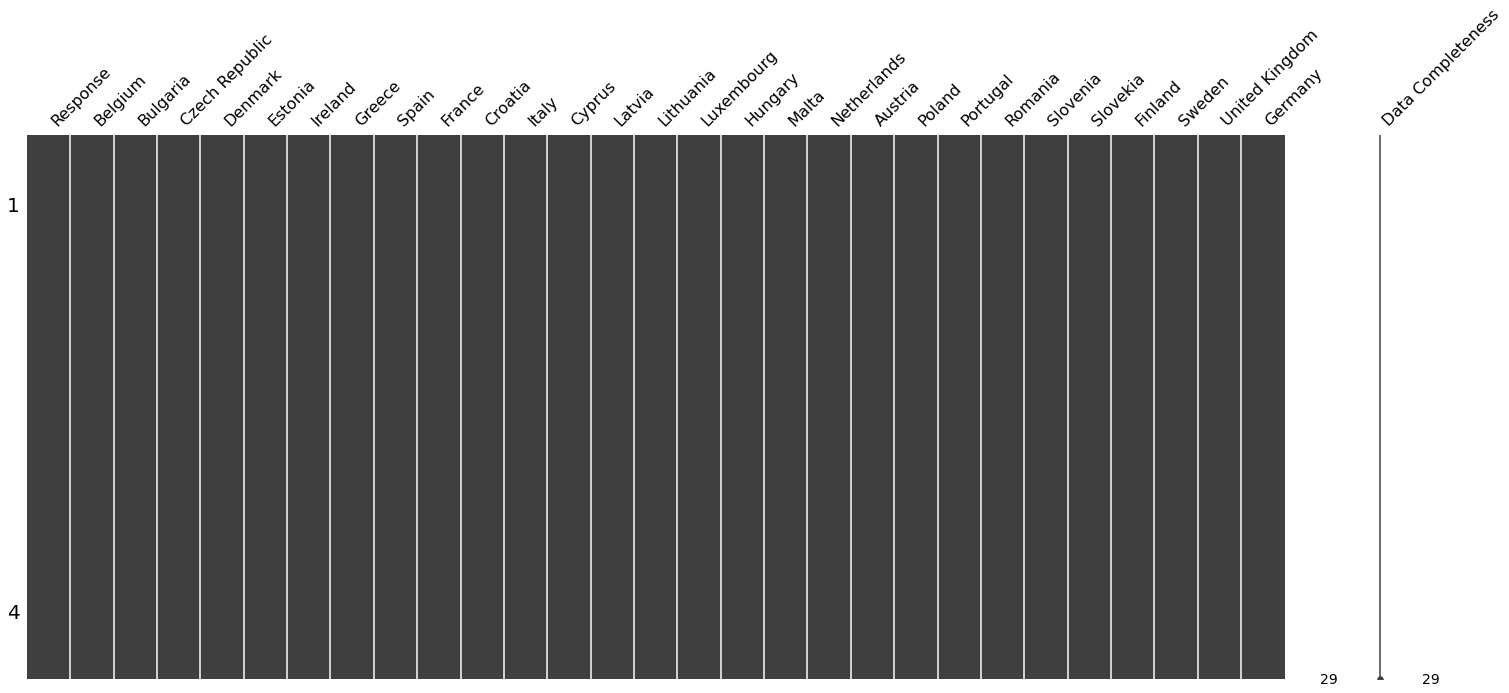

In [171]:
msno.matrix(Question_1, labels=True);

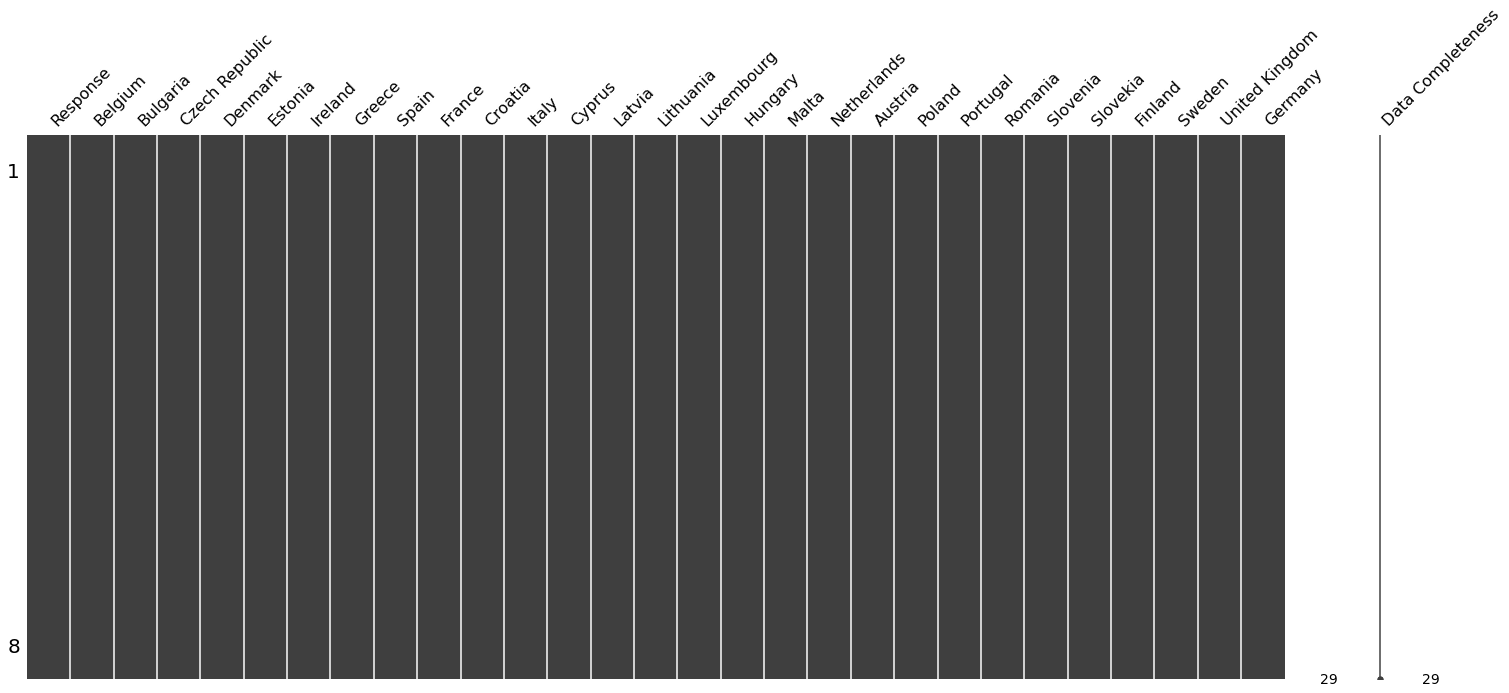

In [172]:
msno.matrix(Question_2, labels=True);

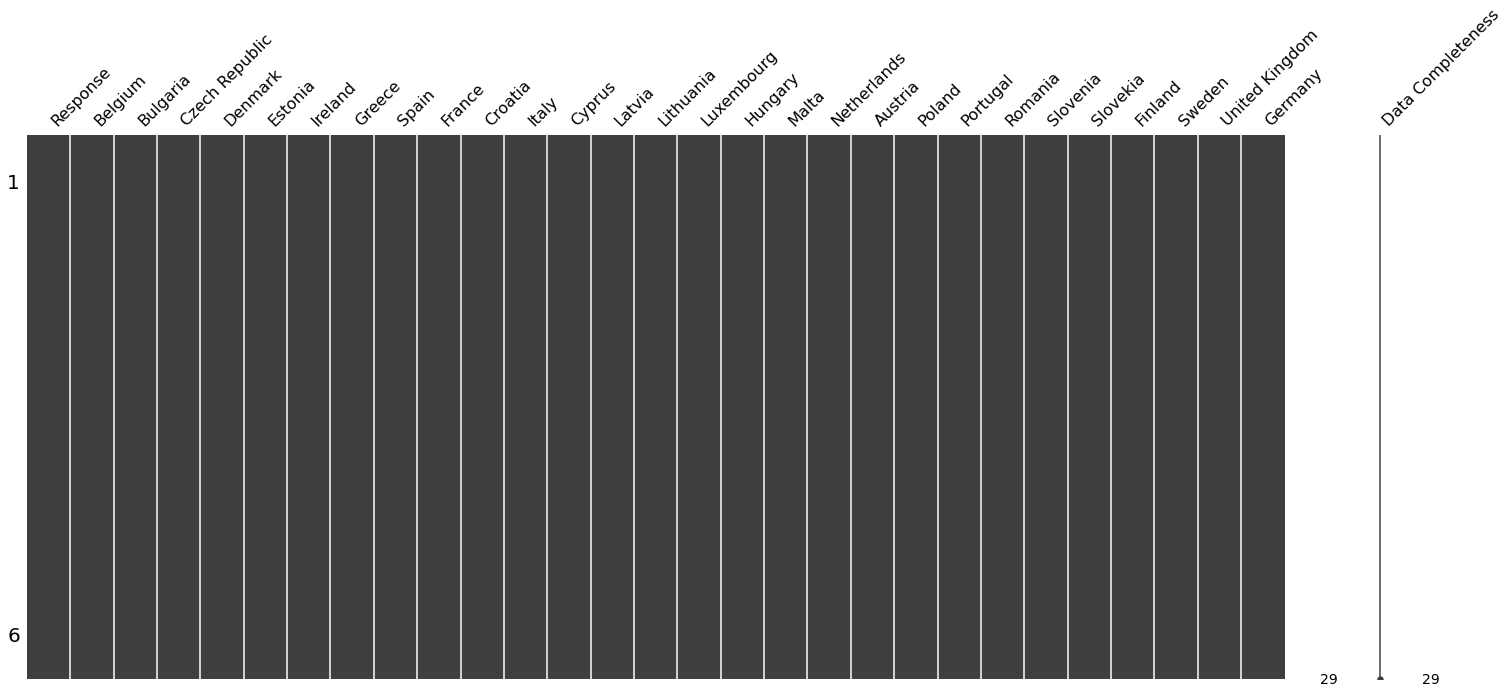

In [173]:
msno.matrix(Question_4, labels=True);

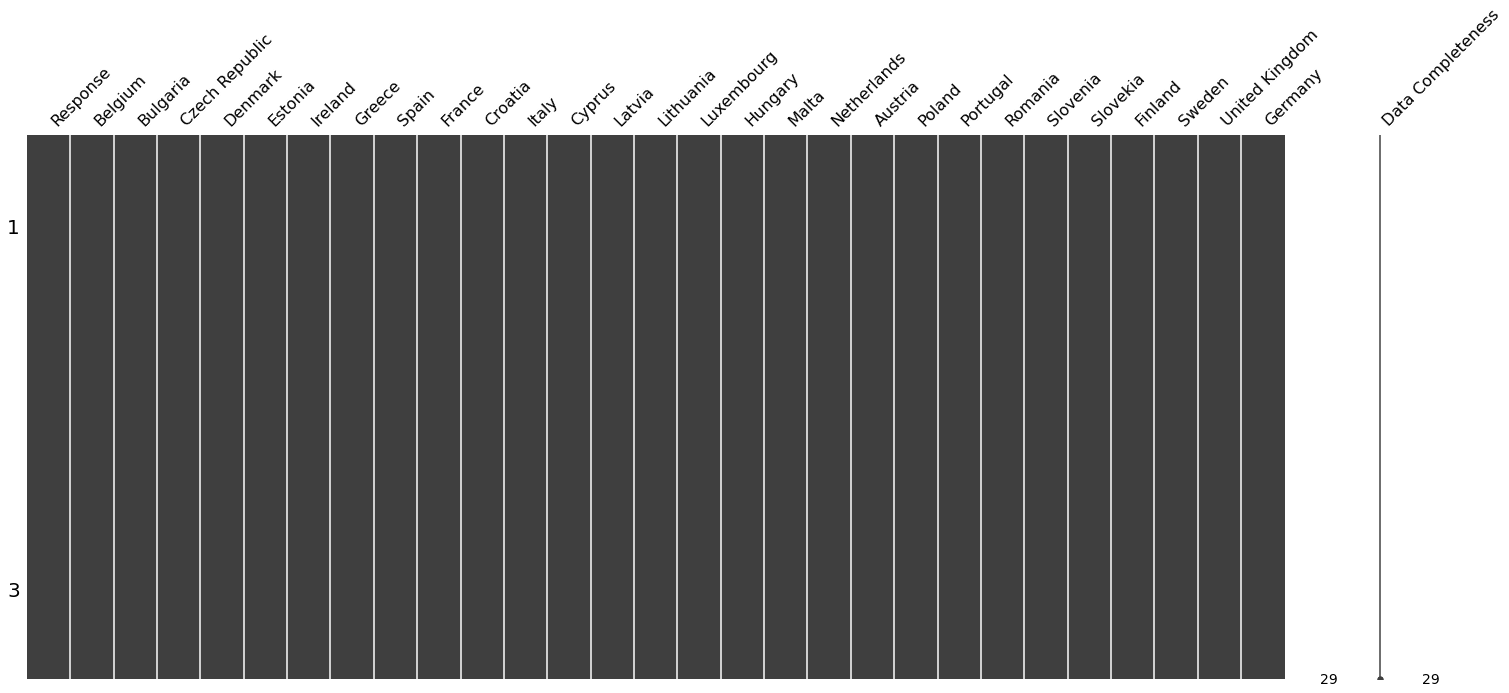

In [174]:
msno.matrix(Question_5_1, labels=True);

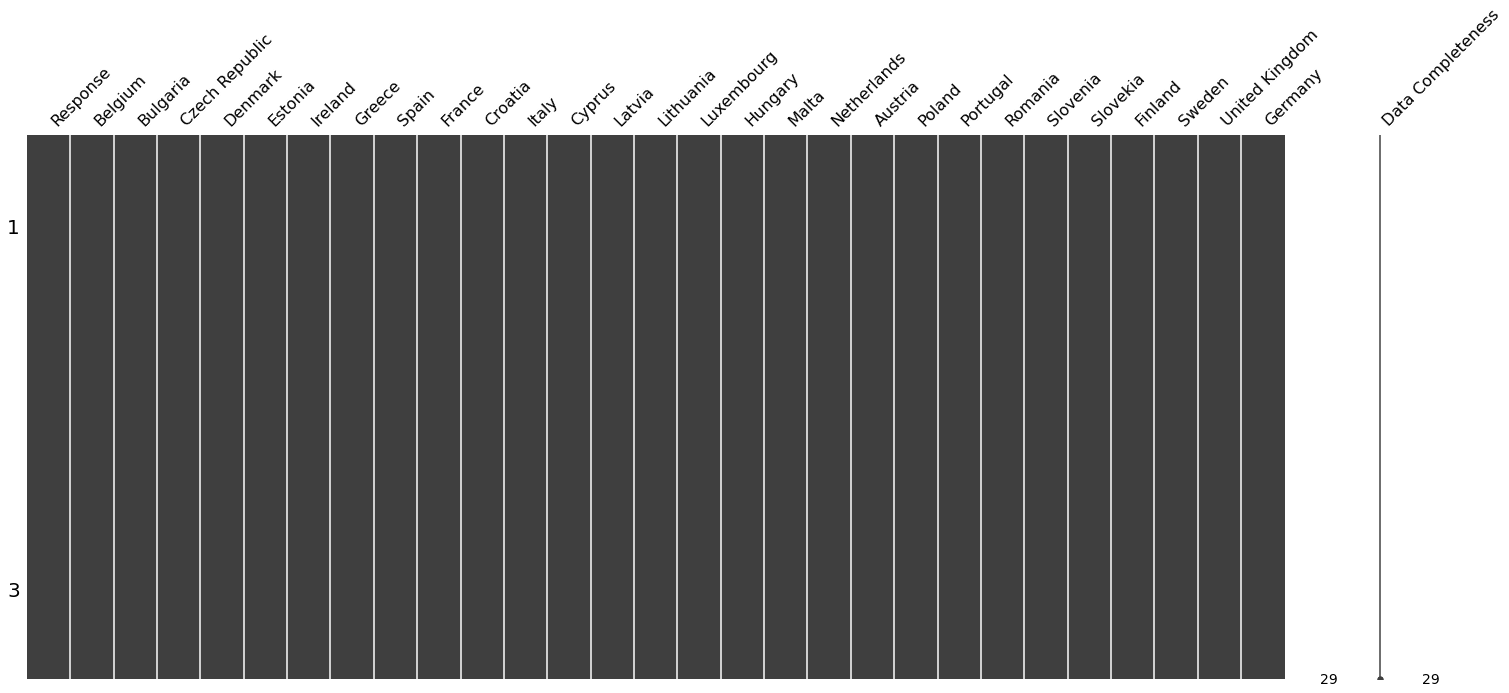

In [175]:
msno.matrix(Question_5_2, labels=True);

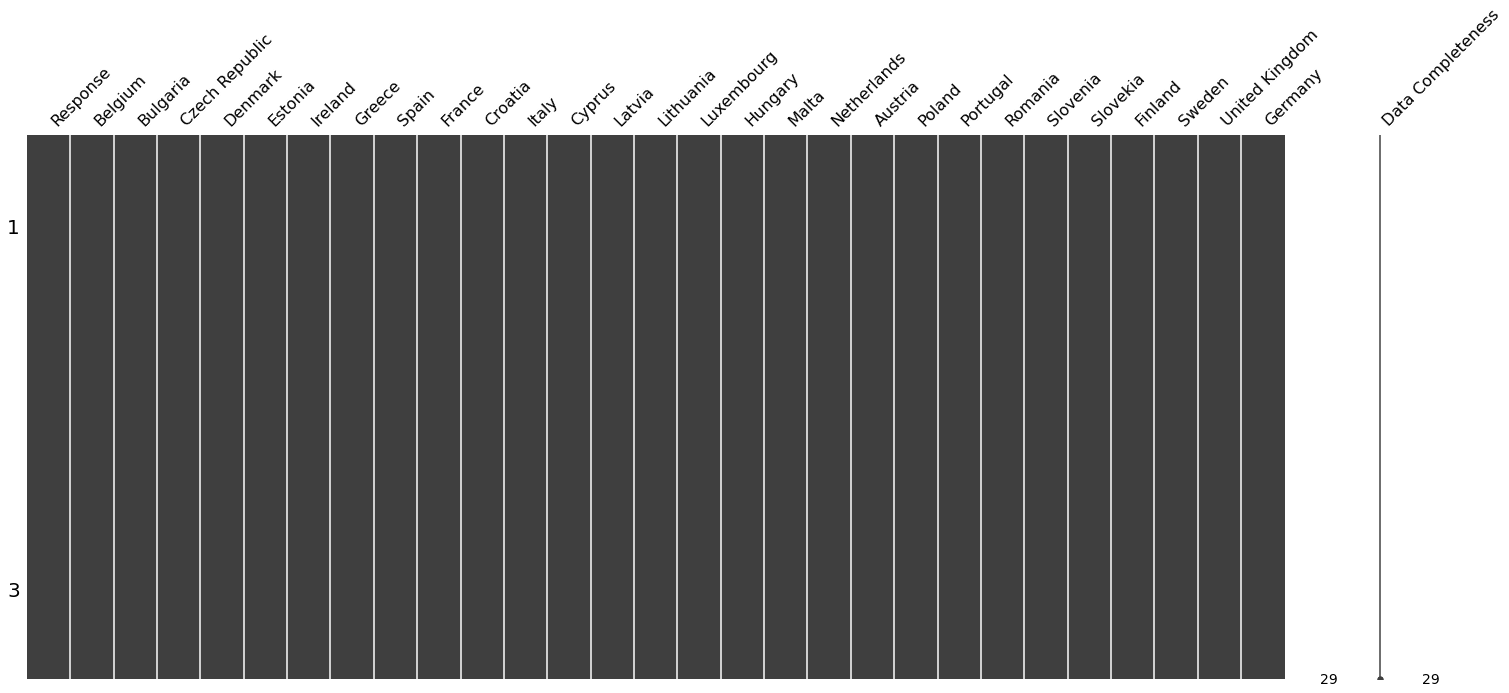

In [176]:
msno.matrix(Question_5_3, labels=True);

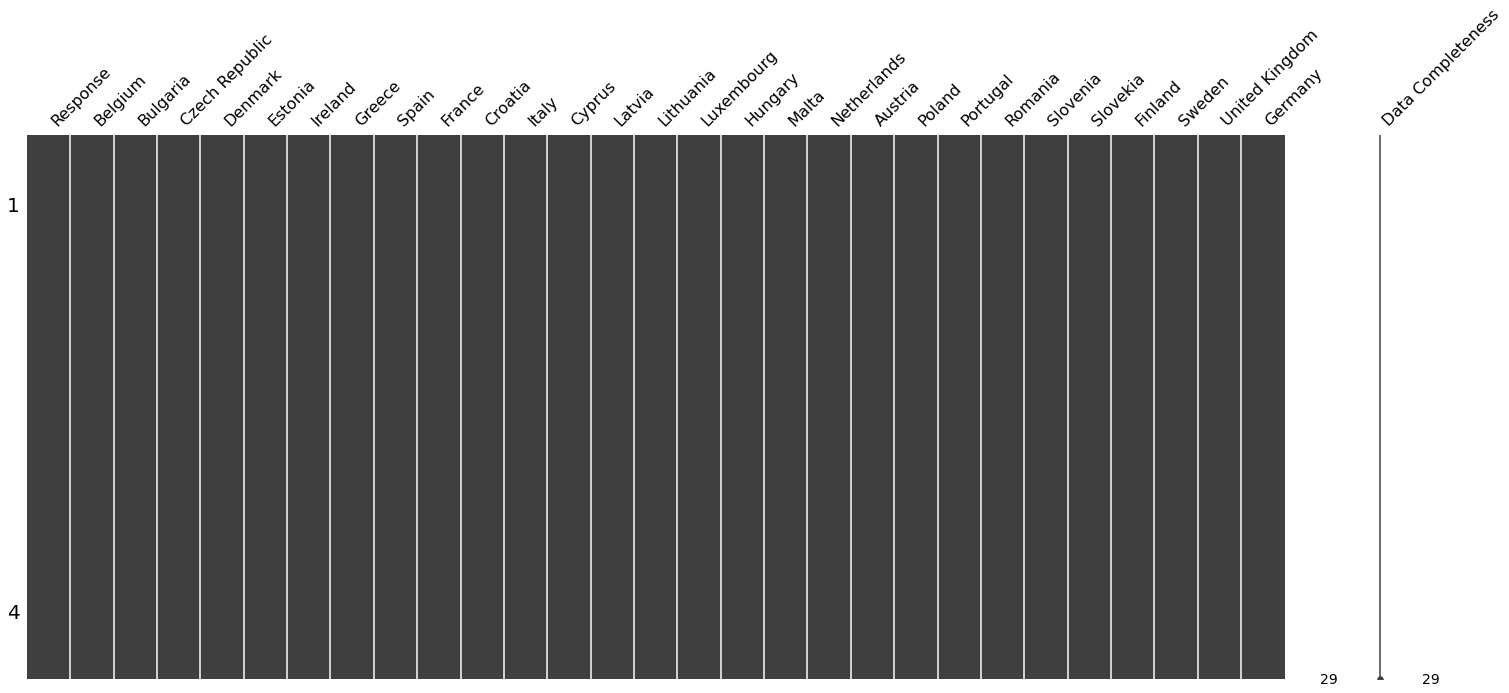

In [177]:
msno.matrix(Question_6, labels=True);

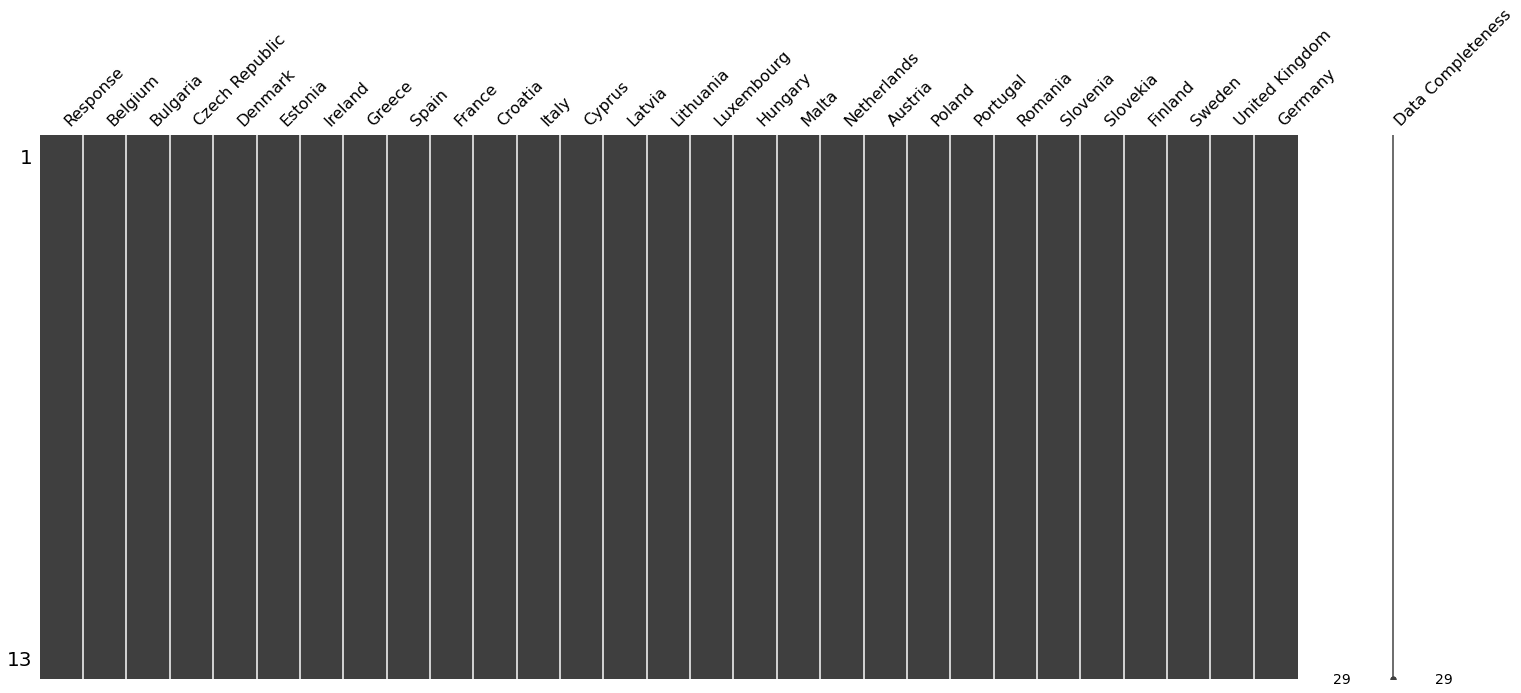

In [178]:
msno.matrix(Question_8, labels=True);

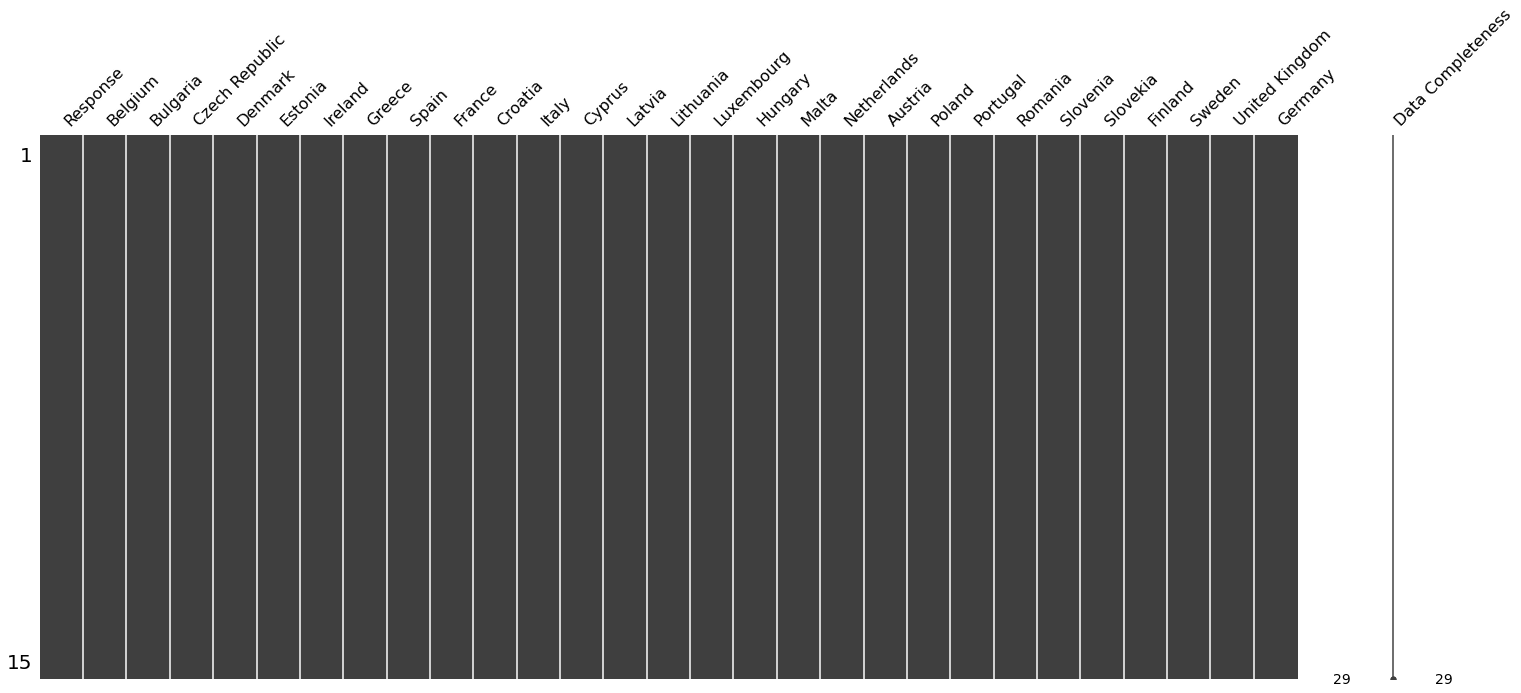

In [179]:
msno.matrix(Question_12, labels=True);

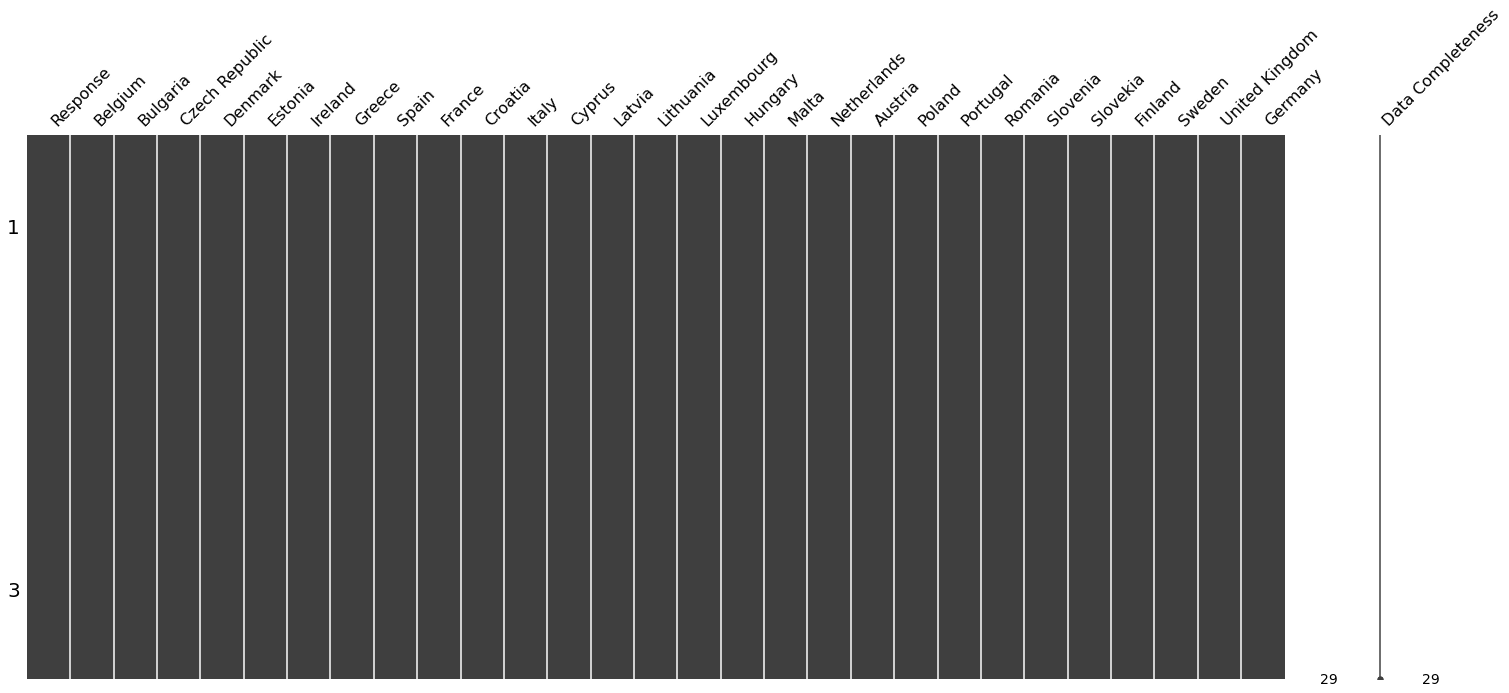

In [31]:
msno.matrix(Question_15, labels=True);

Fortunately, none of the dataframes contain missing values. 

# Question 1: Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?

In [192]:
df = Question_1
title = " Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?"

In [277]:
def plot_hist(df, title):
    """Takes each dataframe object, unpivots it and plots a histogram"""
    df= df.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
    fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
    sns.set_theme(style="darkgrid")
    ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_1)
    ax.set_title(title, fontdict = {"fontsize":35})
    ax.set_xlabel("Country", fontsize = 35)
    ax.set_ylabel("Number", fontsize = 35)
    ax.tick_params( labelsize = 30, rotation = 90)
    ax.legend( fontsize = 30)
    ax.grid(linewidth= 4, which = "minor")
   

    

In [279]:
plot_hist(Question_1, "Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?" )

AttributeError: 'NoneType' object has no attribute 'melt'

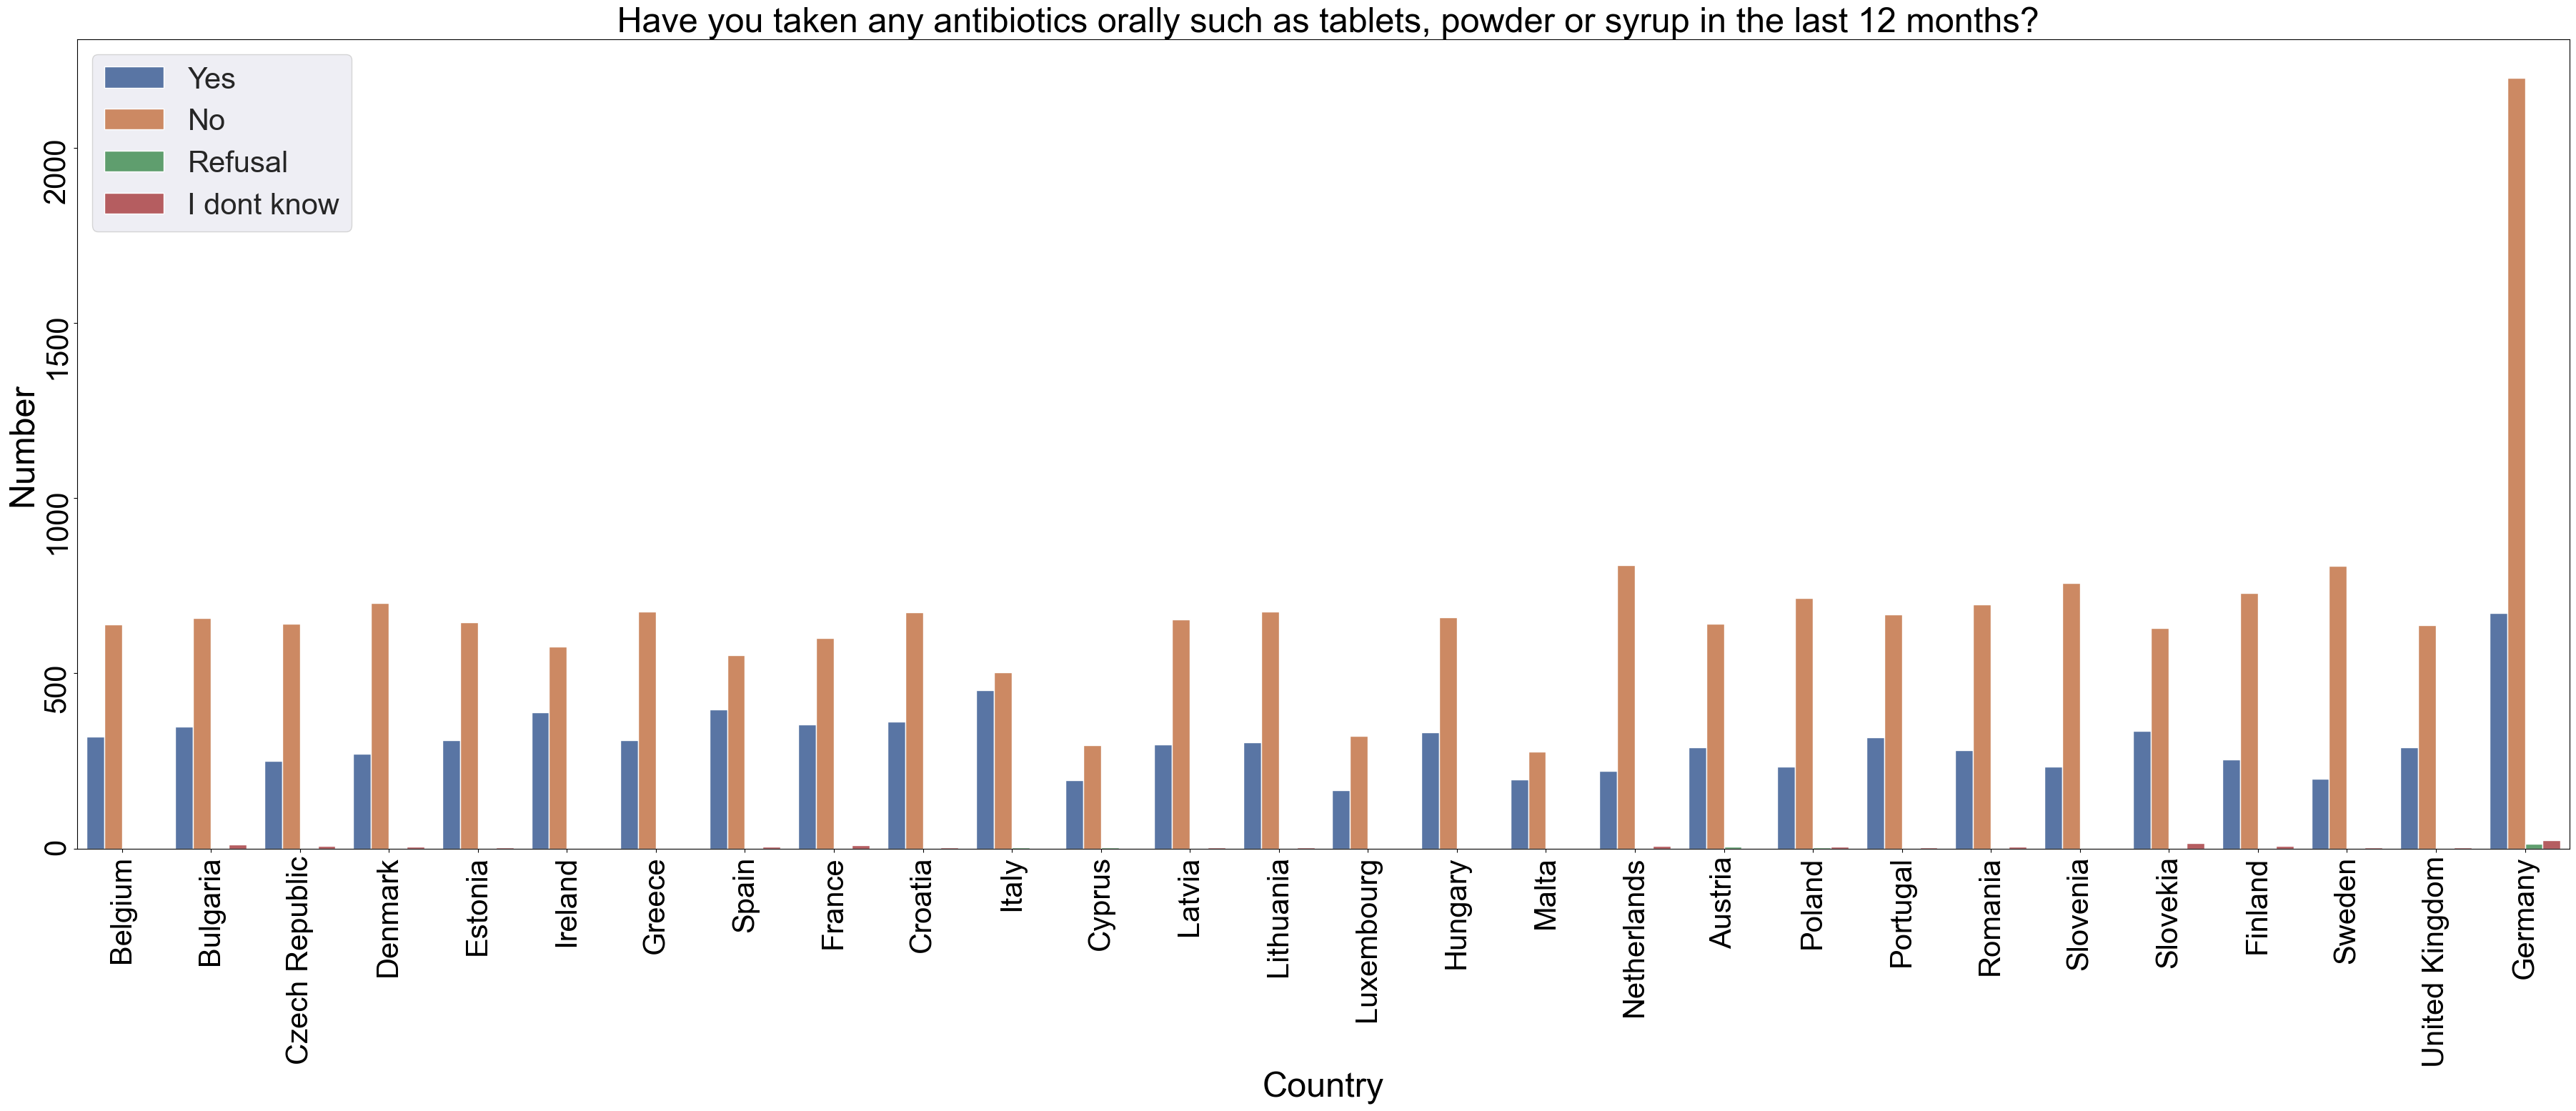

In [32]:
Question_1= Question_1.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_1.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_1)
ax.set_title(" Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( fontsize = 30)
ax.grid(linewidth= 4, which = "minor")



# How did you obtain the last course of antibiotics that you used?¶

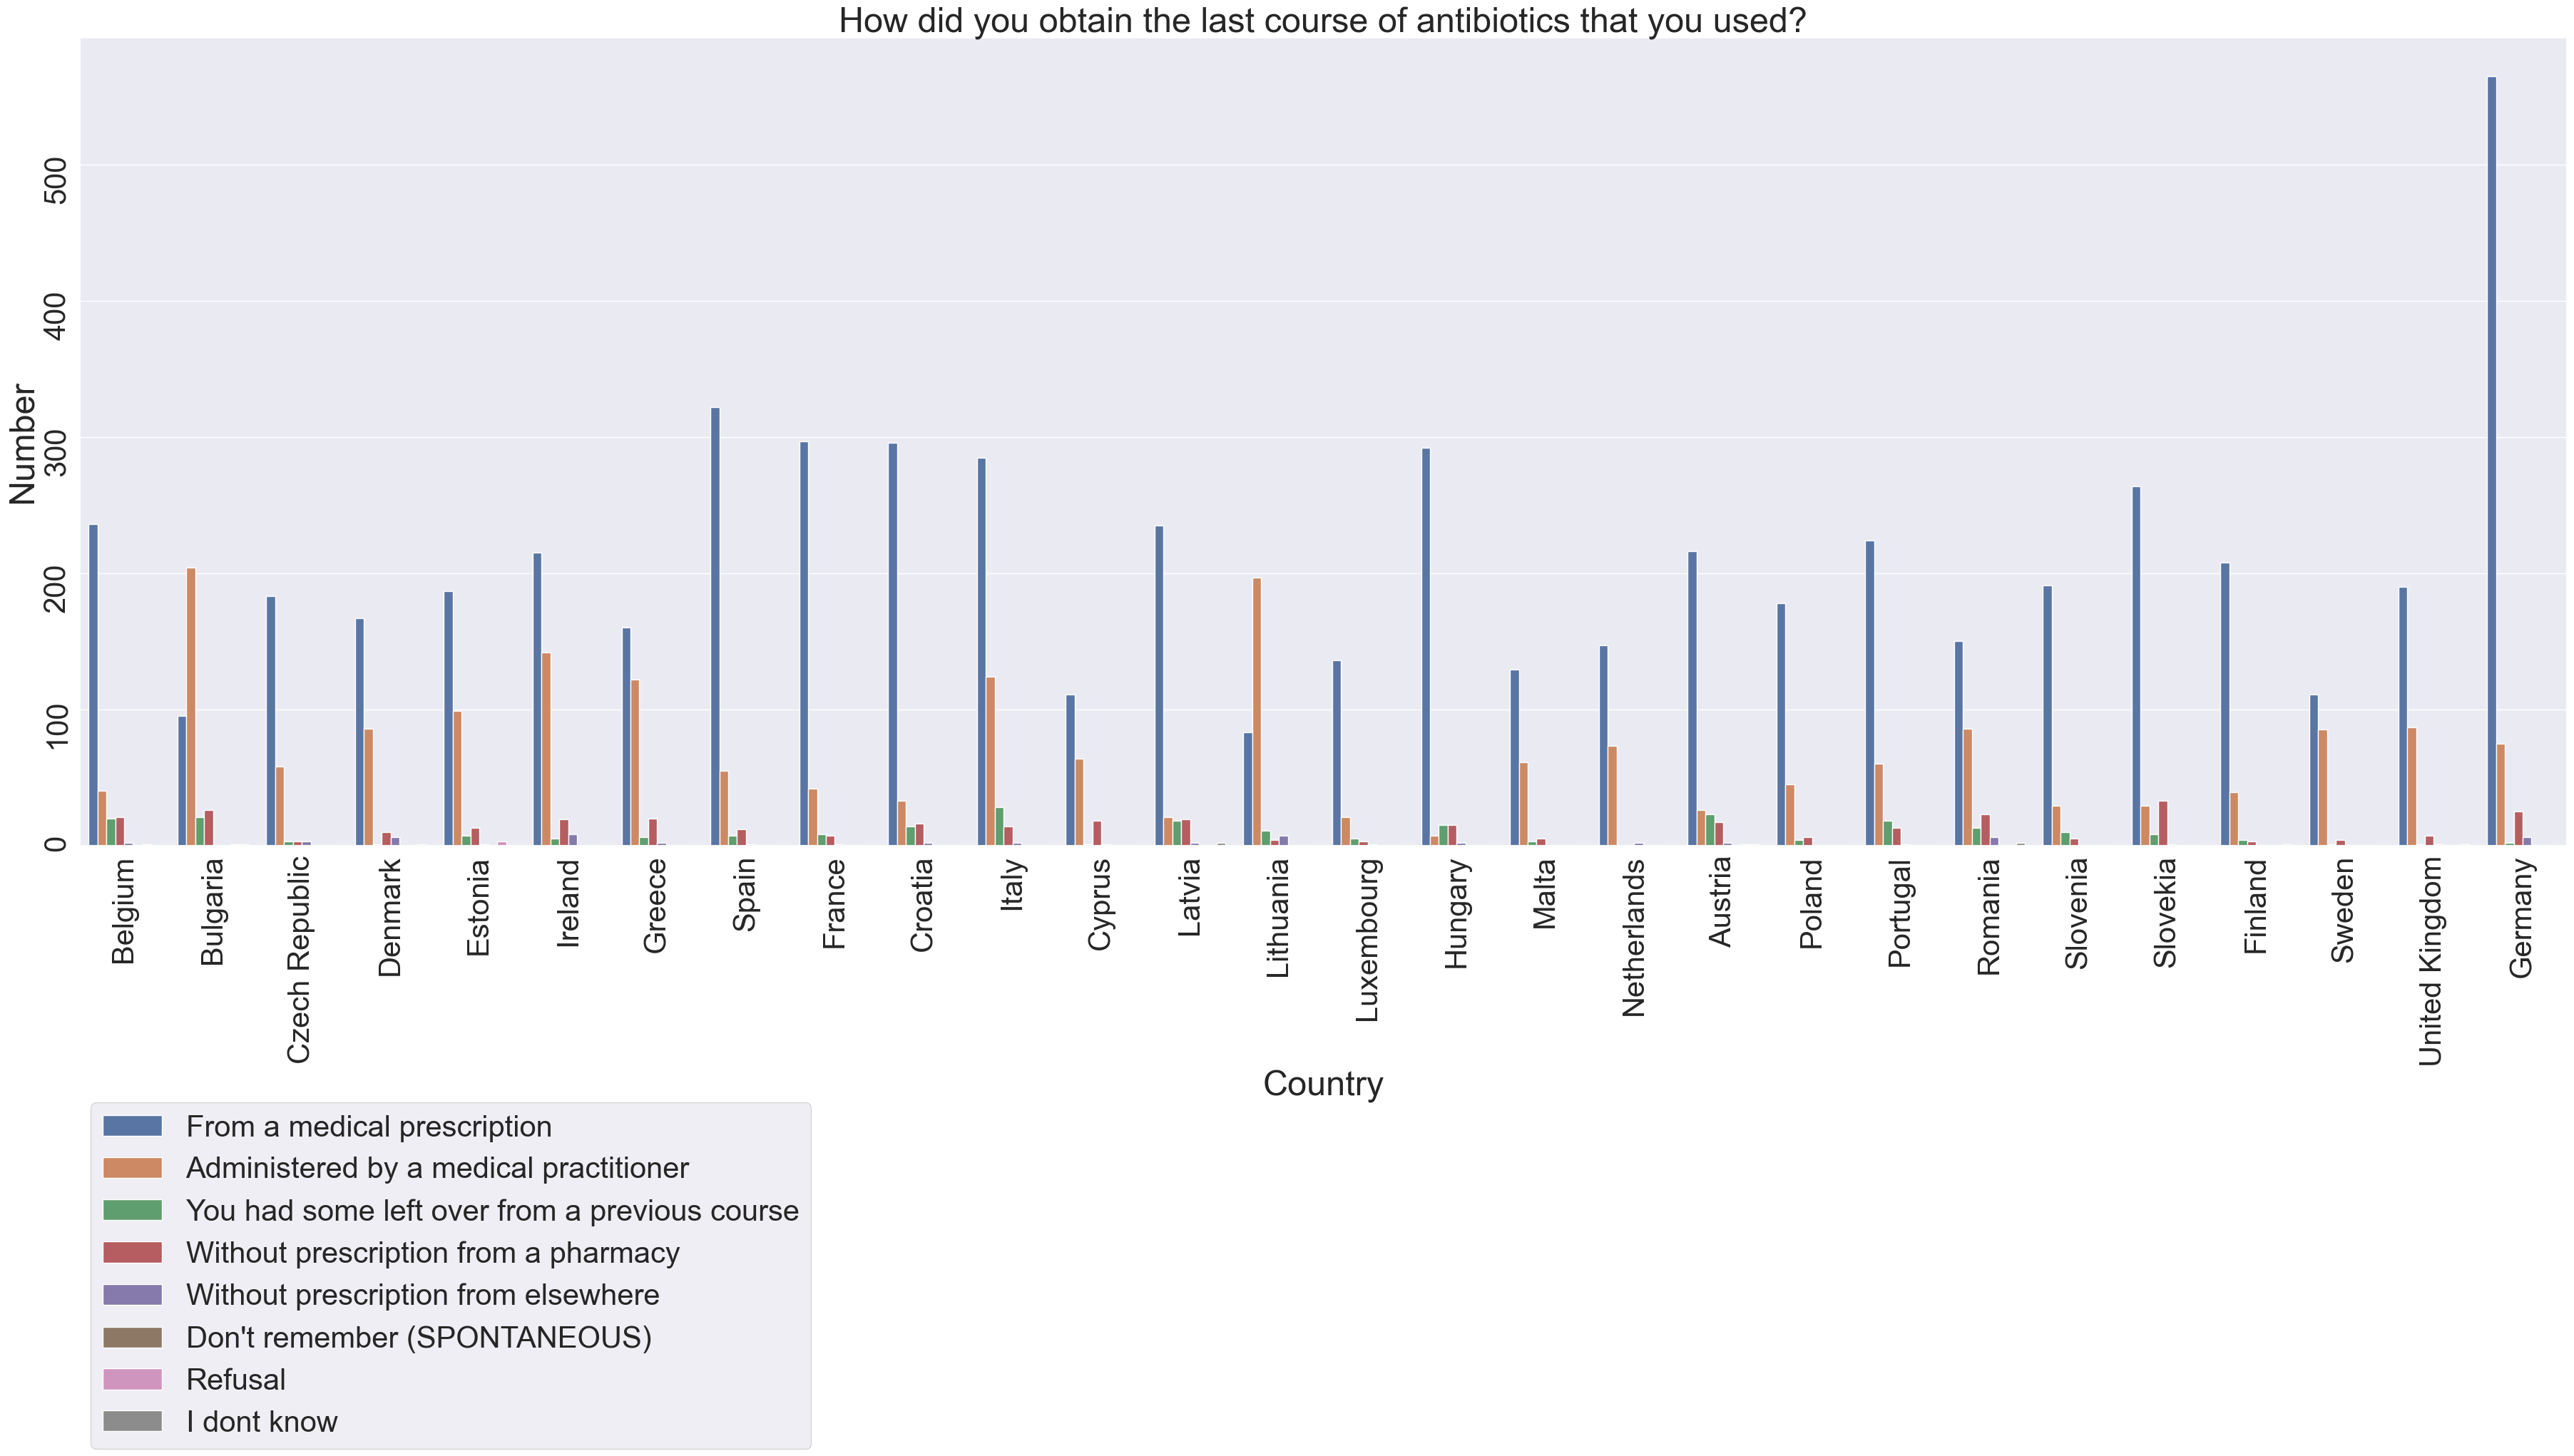

In [33]:
Question_2= Question_2.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_2.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_2)
ax.set_title("How did you obtain the last course of antibiotics that you used?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend(loc= "best", bbox_to_anchor=(0.3, -0.3), fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

# What was the reason for last taking the antibiotics that you used?

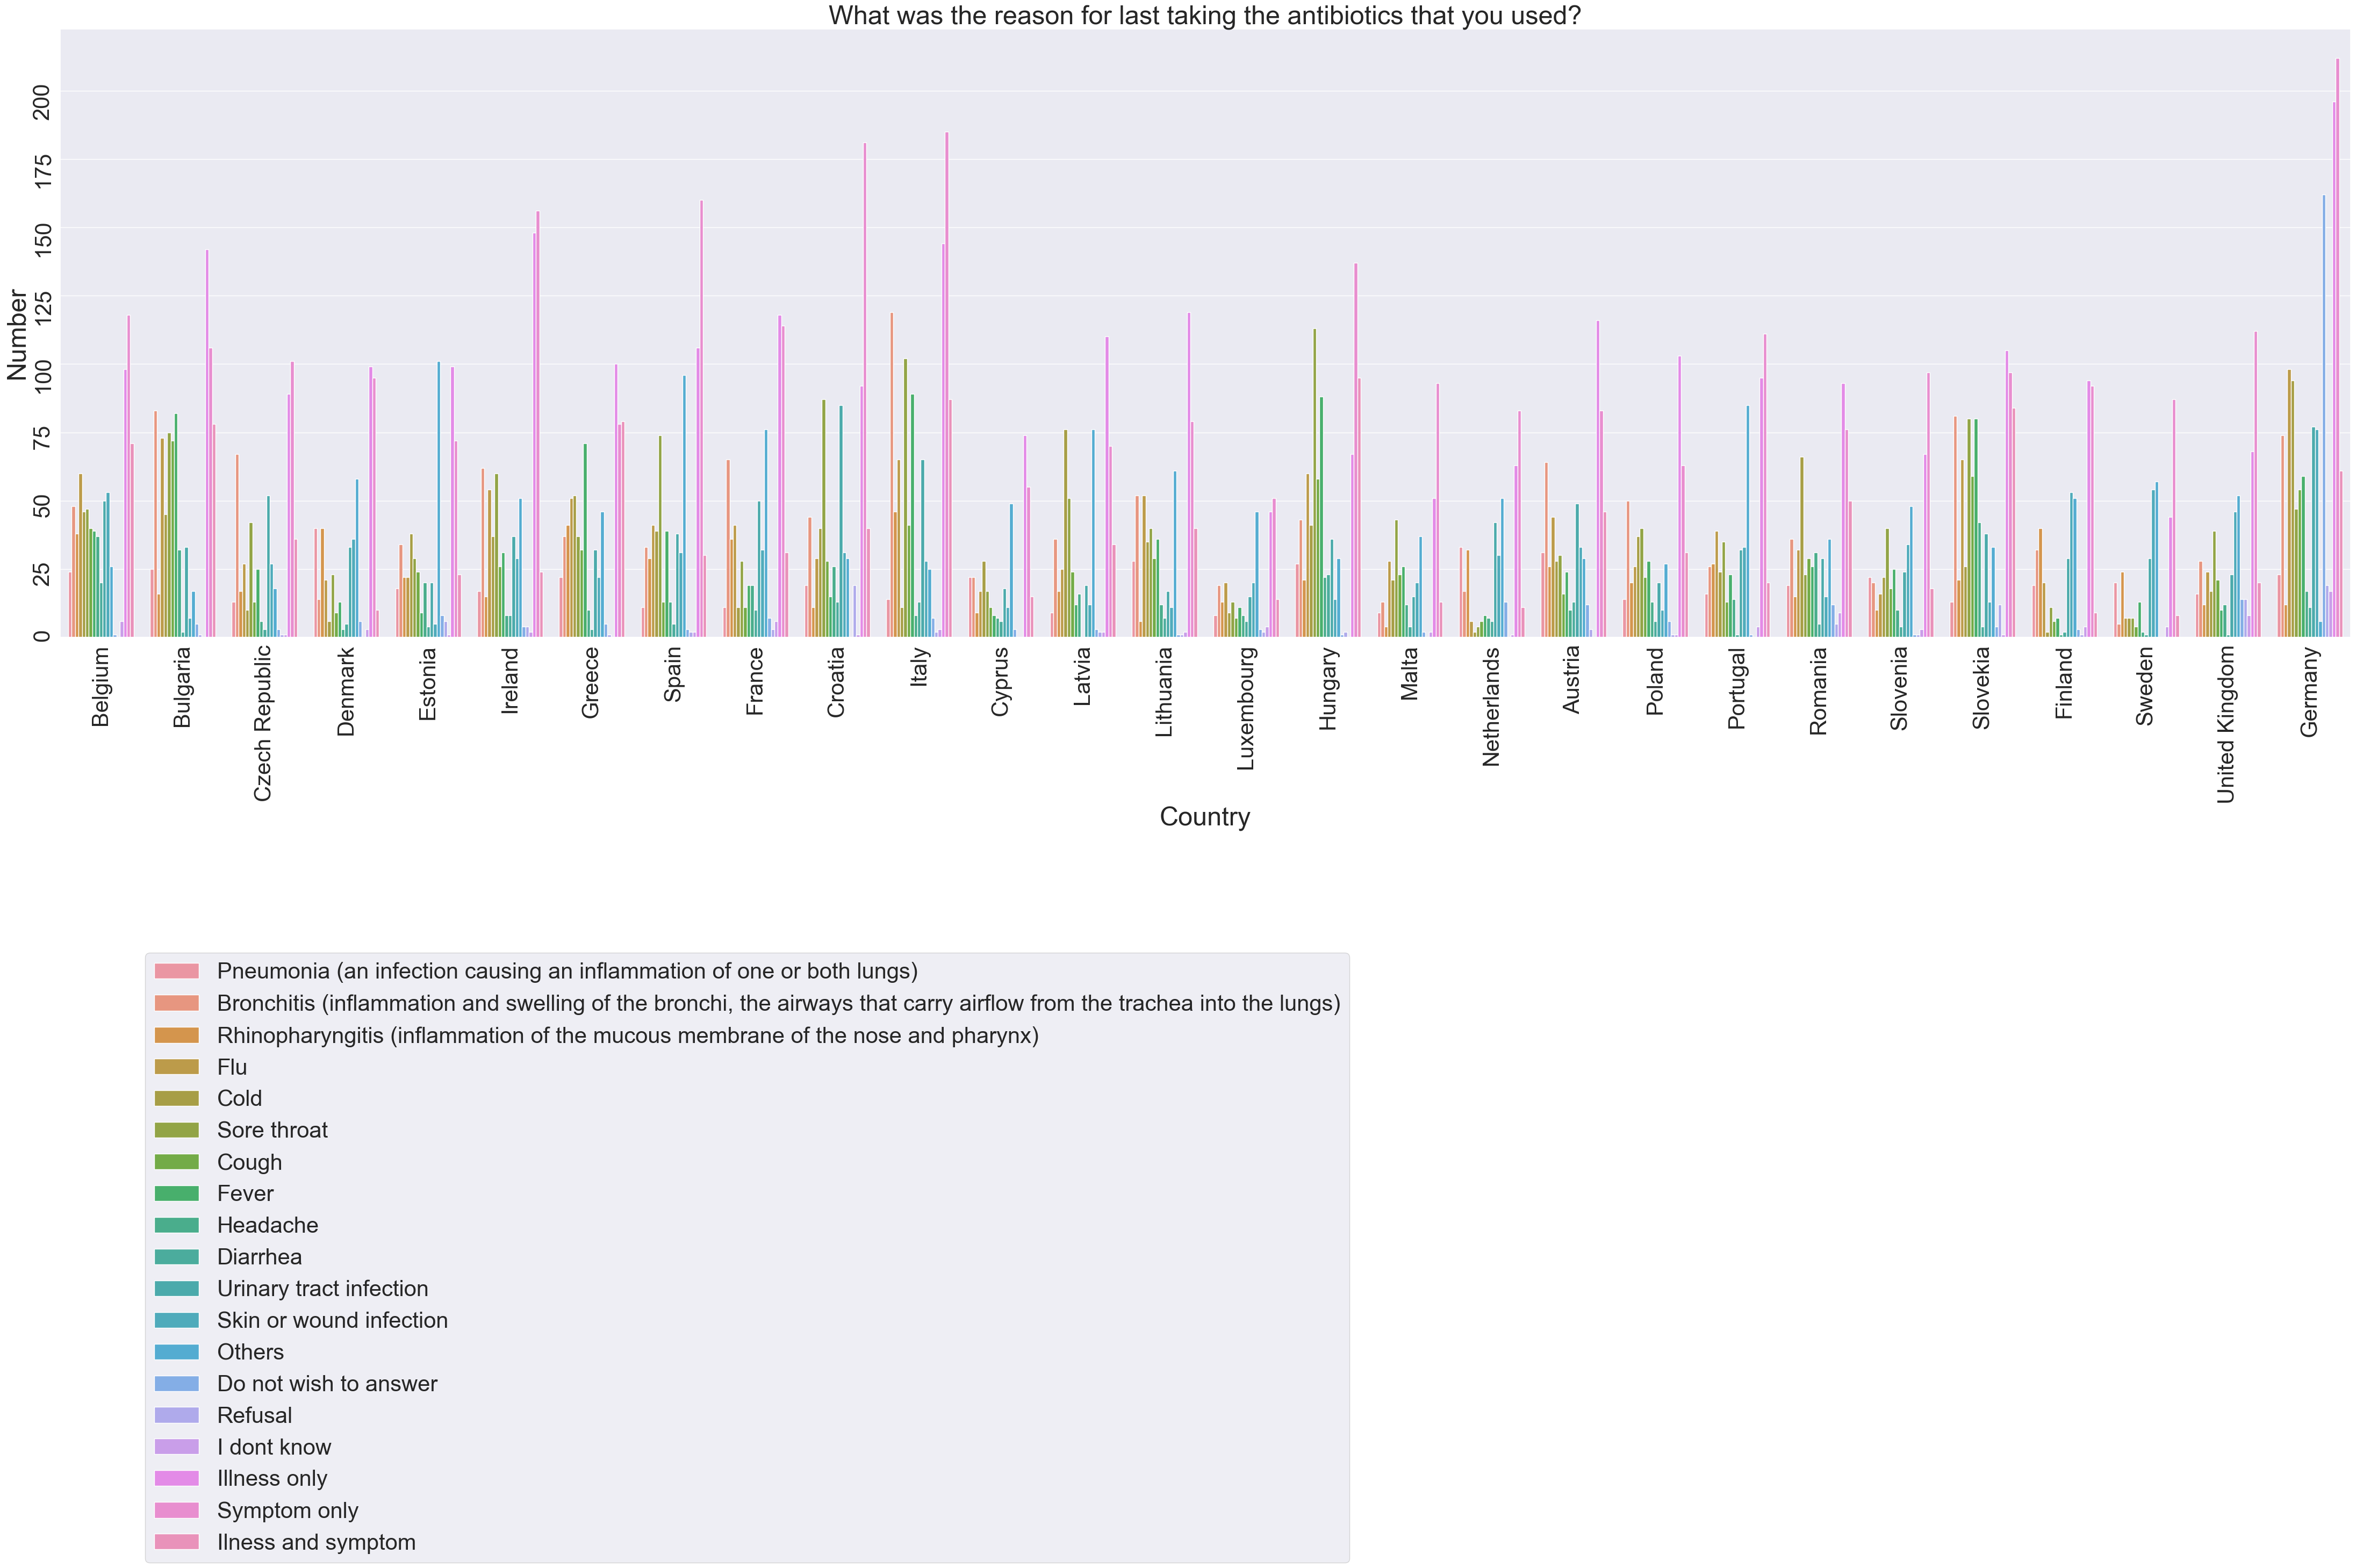

In [34]:
Question_3= Question_3.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_3.head()
fig, ax =plt.subplots(figsize= (55,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_3)
ax.set_title("What was the reason for last taking the antibiotics that you used?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.3, -0.5),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

# Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics

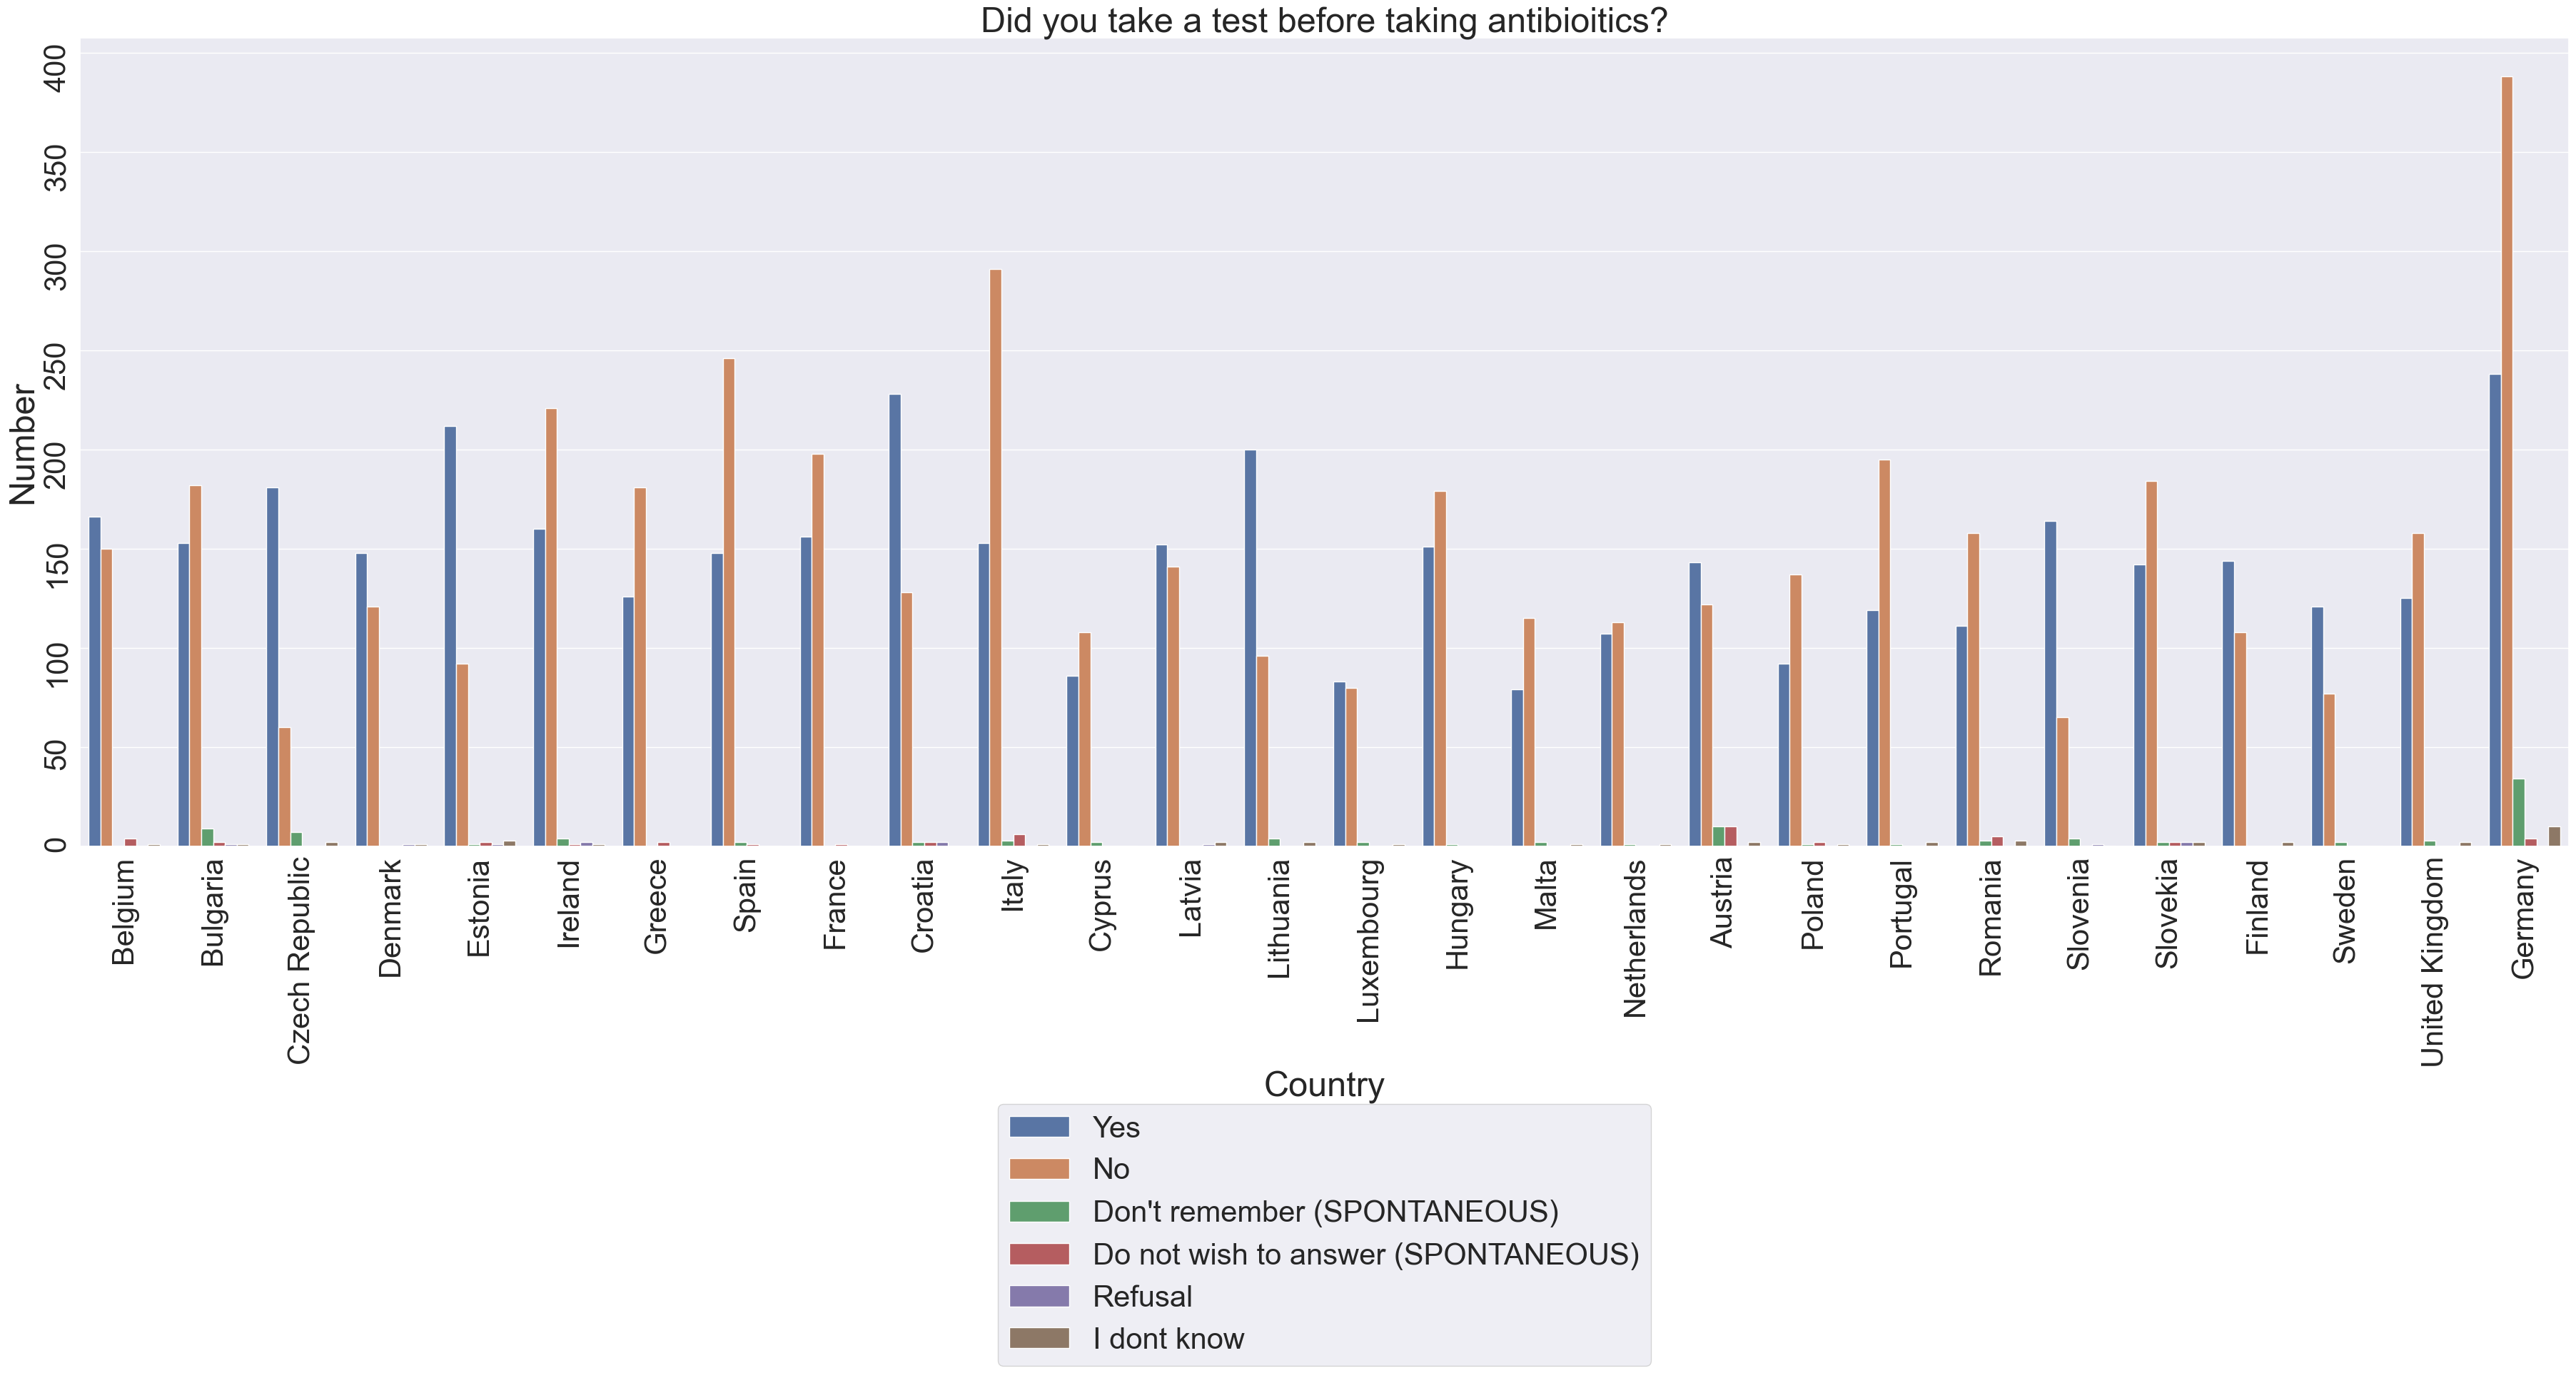

In [35]:
Question_4= Question_4.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_4.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_4)
ax.set_title("Did you take a test before taking antibioitics?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

The response to question 4 shows that most times, antibiotics are administered based on suspicion, before the test results are available. Czech Republic, Estonia, Croatia, Lithuania, Austria, and Finland appear to have a system that works based on the recommendation; diagnoses before administration of antibiotics 

# For each of the following statements, please tell me whether you think it is true or false. 
QC5.1: Antibiotics kill viruses

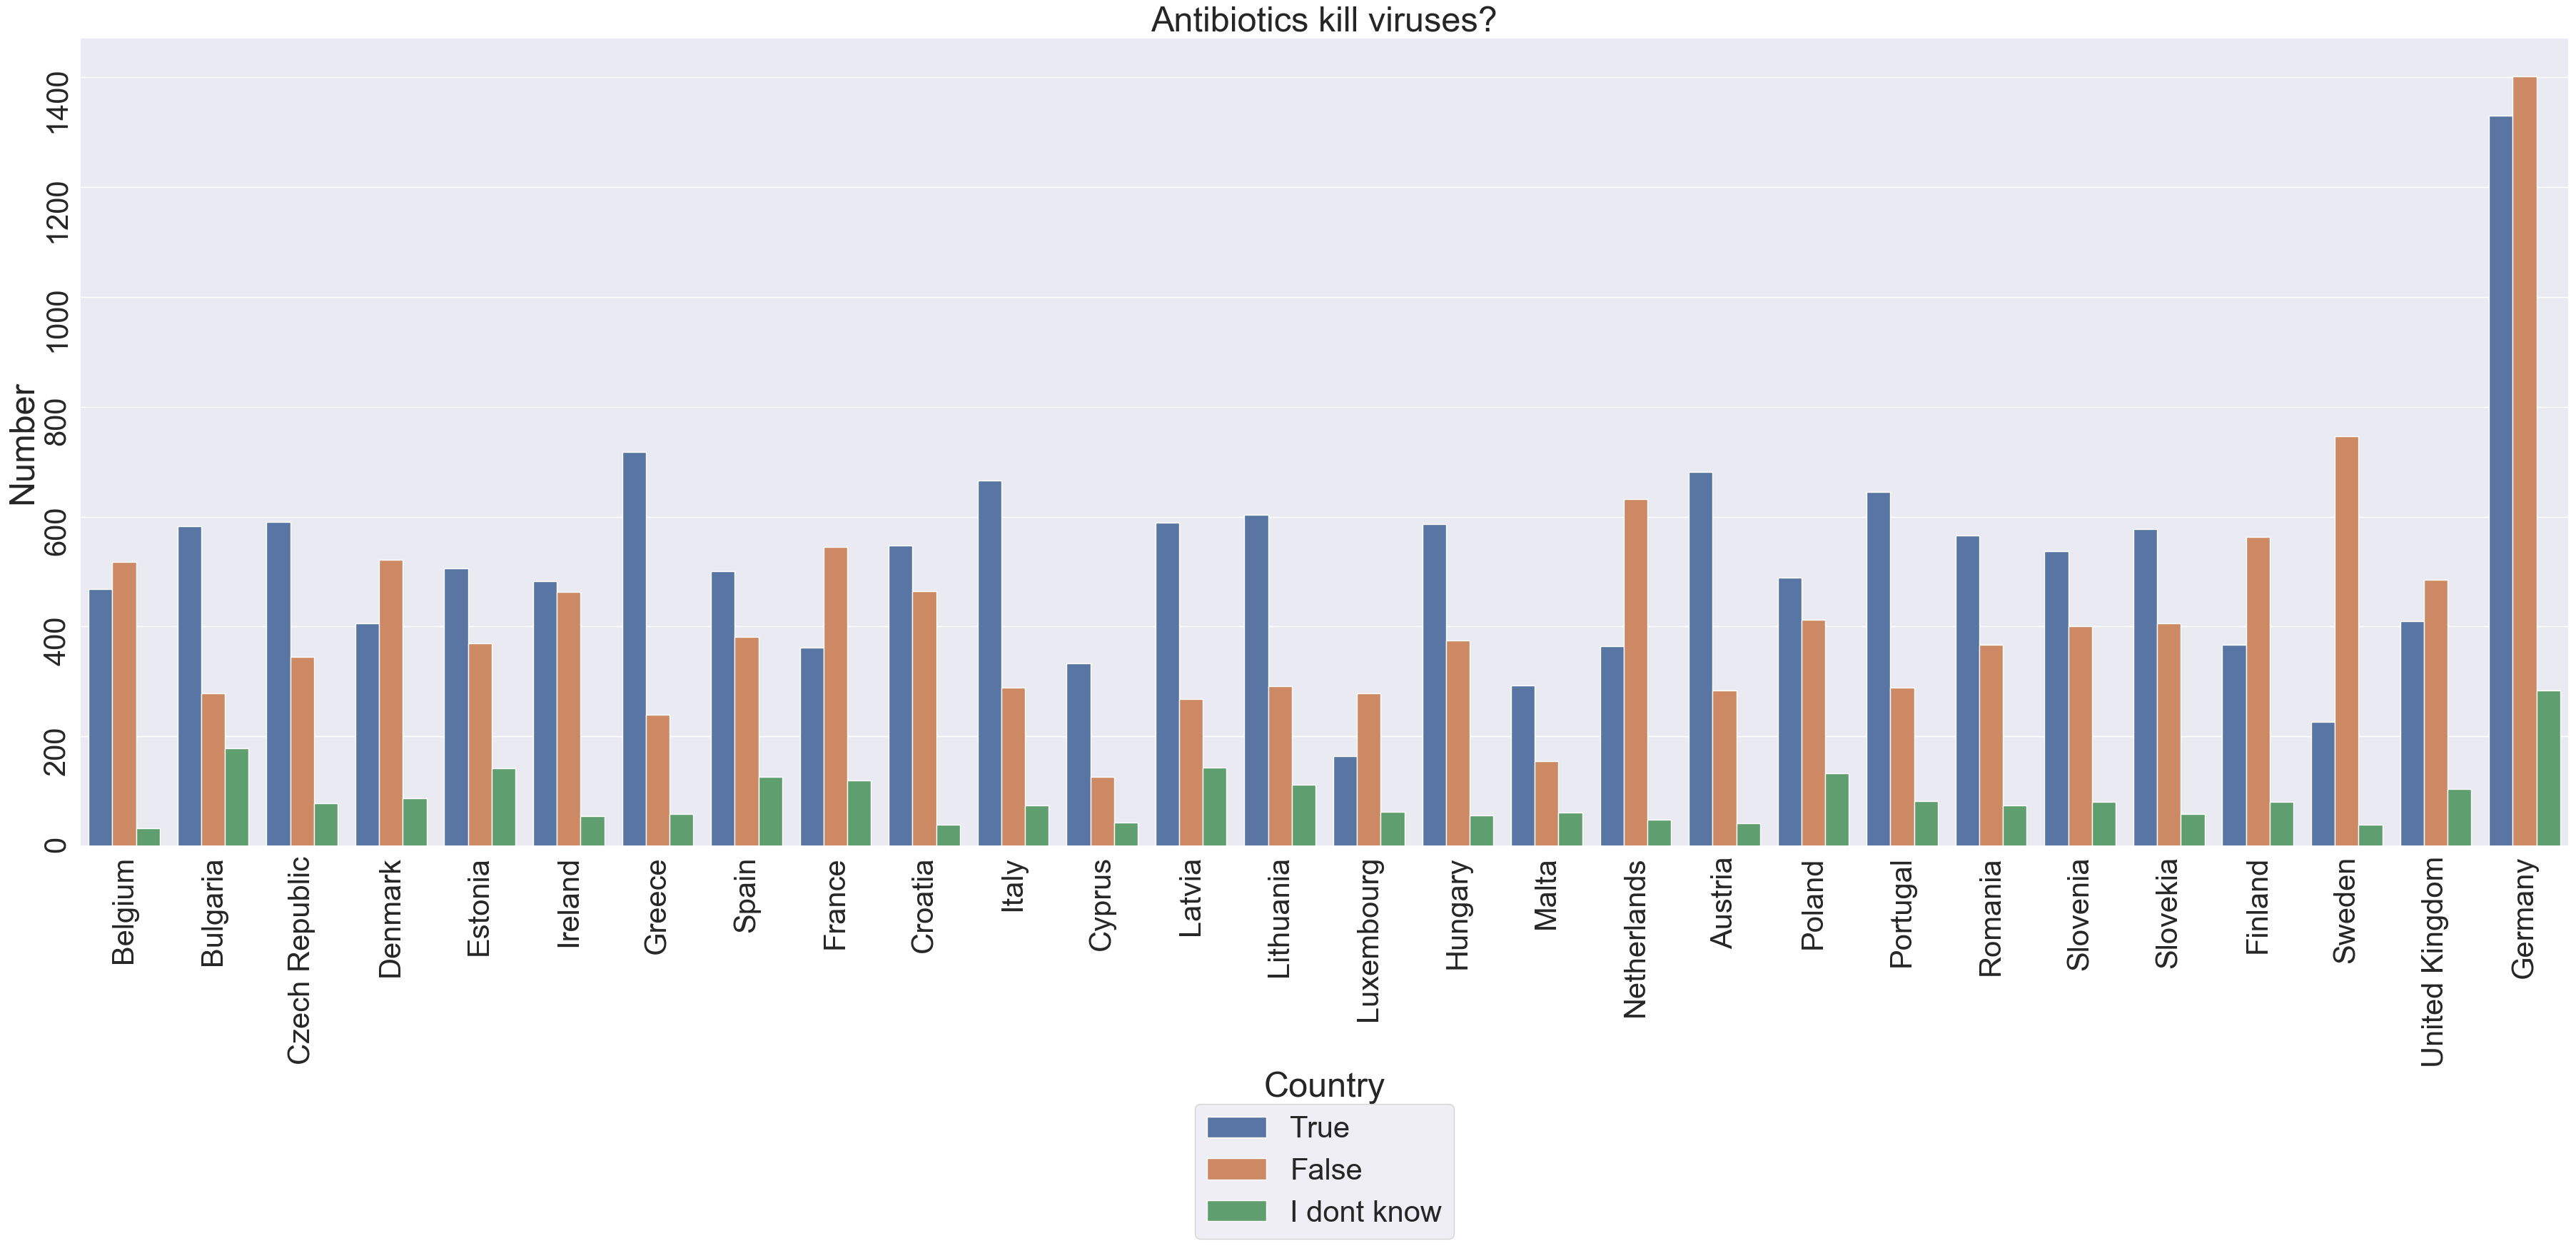

In [36]:
Question_5_1= Question_5_1.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_5_1.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_5_1)
ax.set_title("Antibiotics kill viruses?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

The awareness level is surprising. Antibiotics do not kill viruses

# QC5.2: Antibiotics are effective against colds

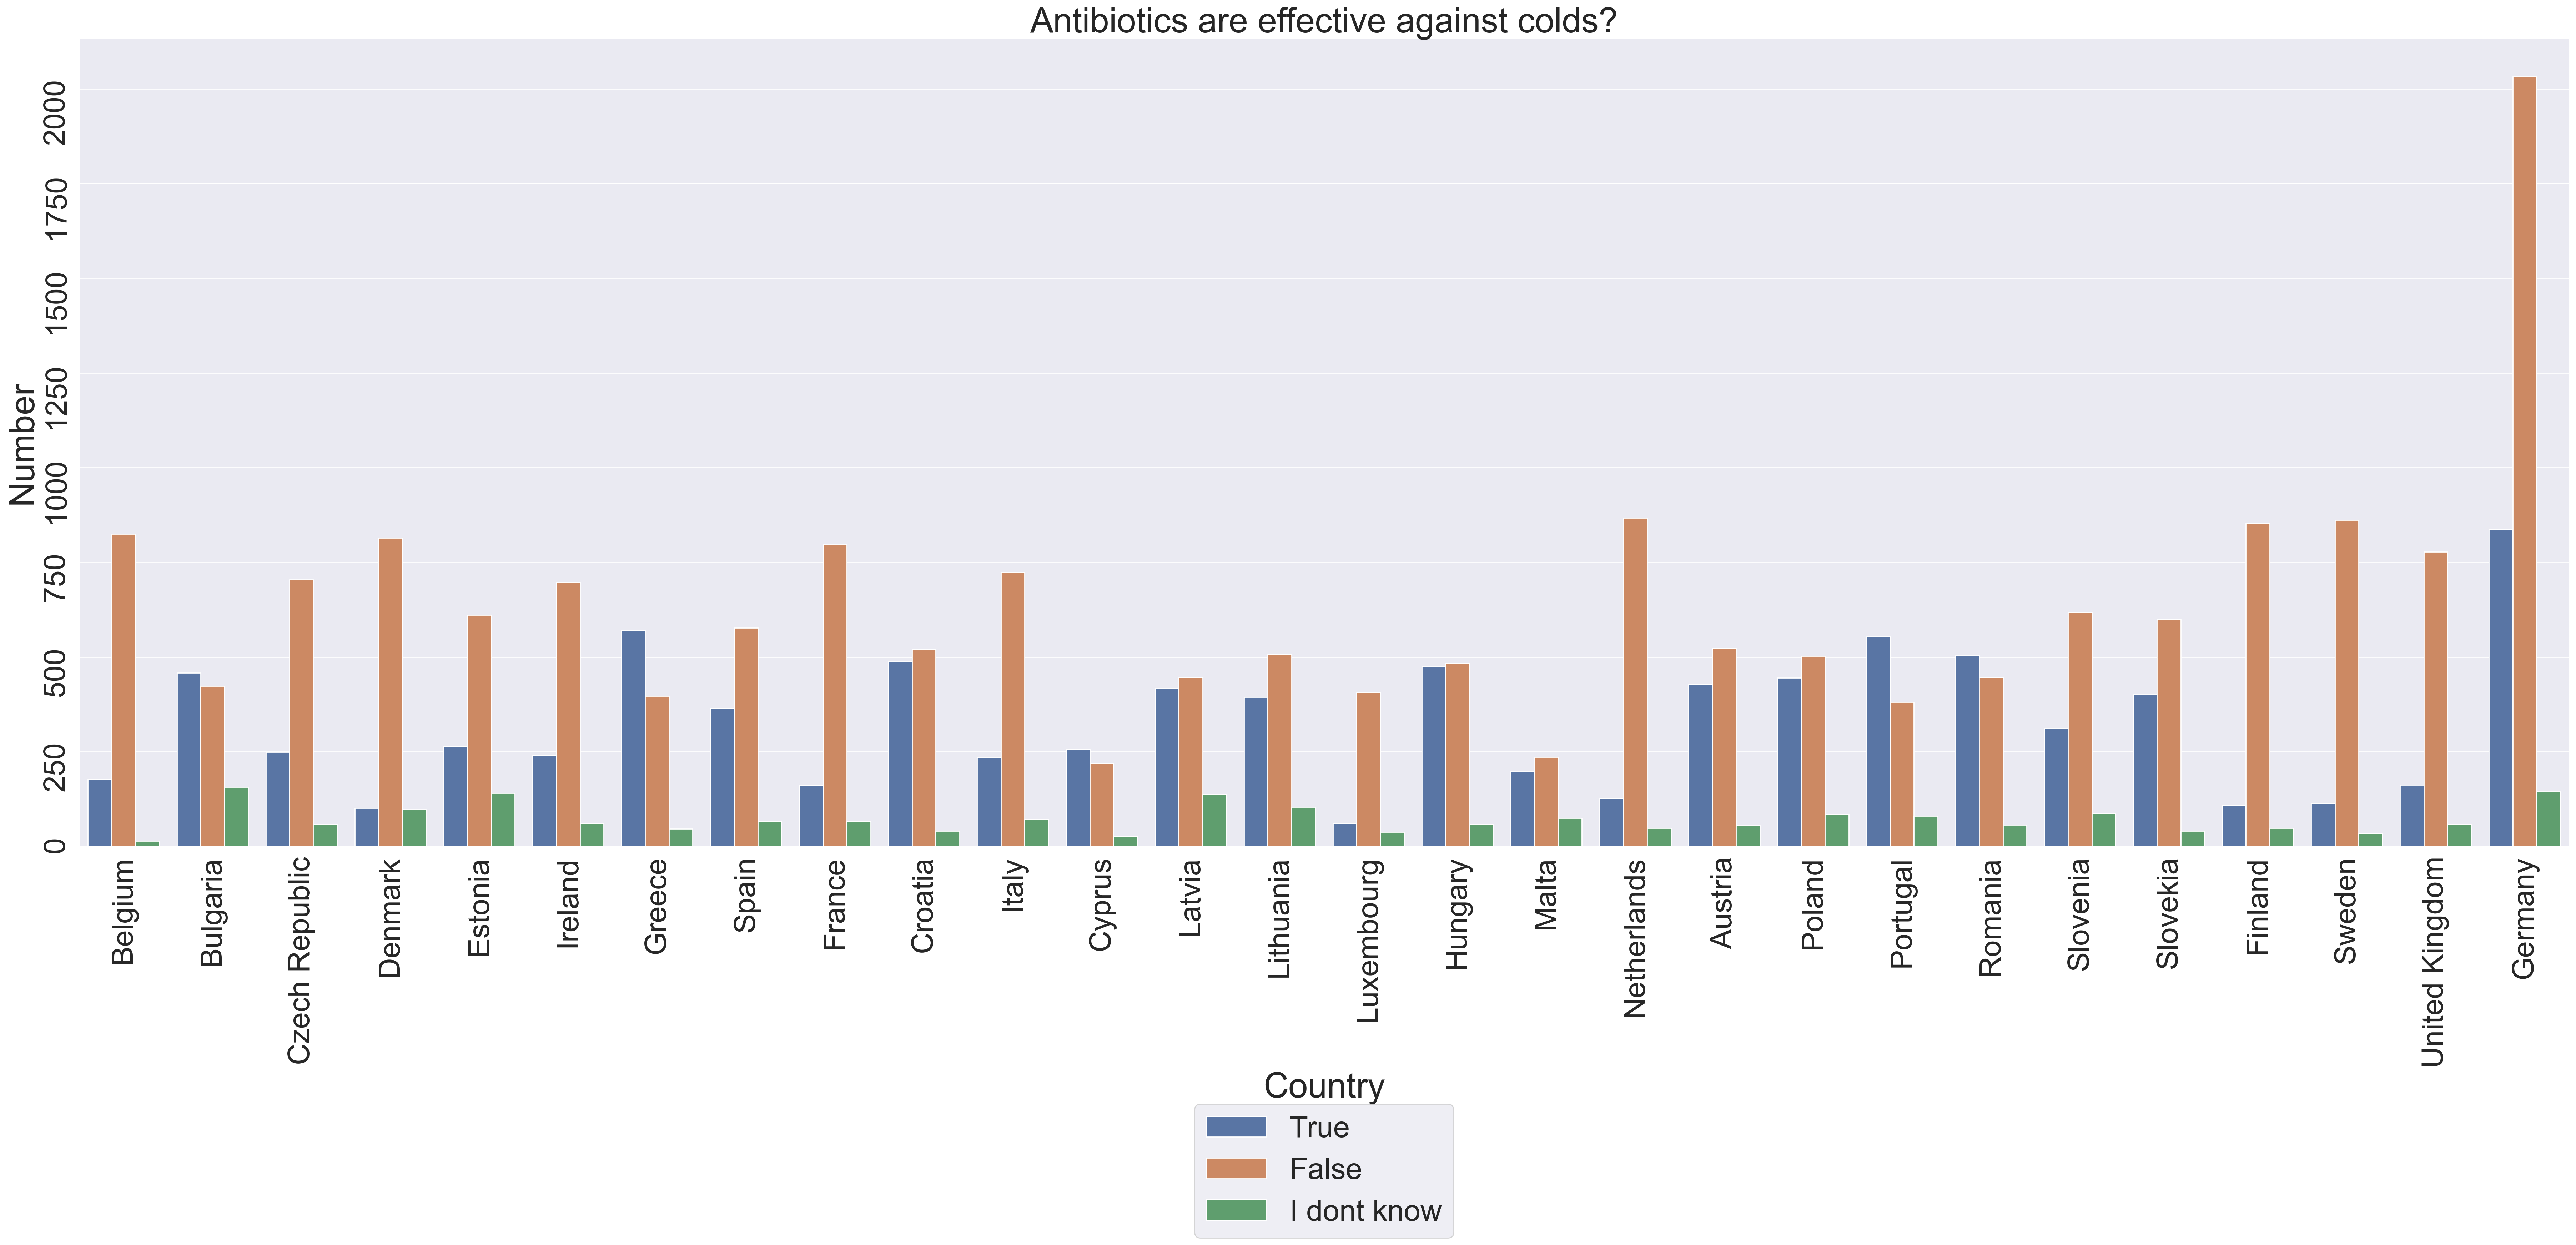

In [37]:
Question_5_2= Question_5_2.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_5_2.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 200)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_5_2)
ax.set_title("Antibiotics are effective against colds?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

Well, this can pass for a rephrase of question 5.1

   # QC 5.3 Unnecessary use of antibiotics makes them become ineffective

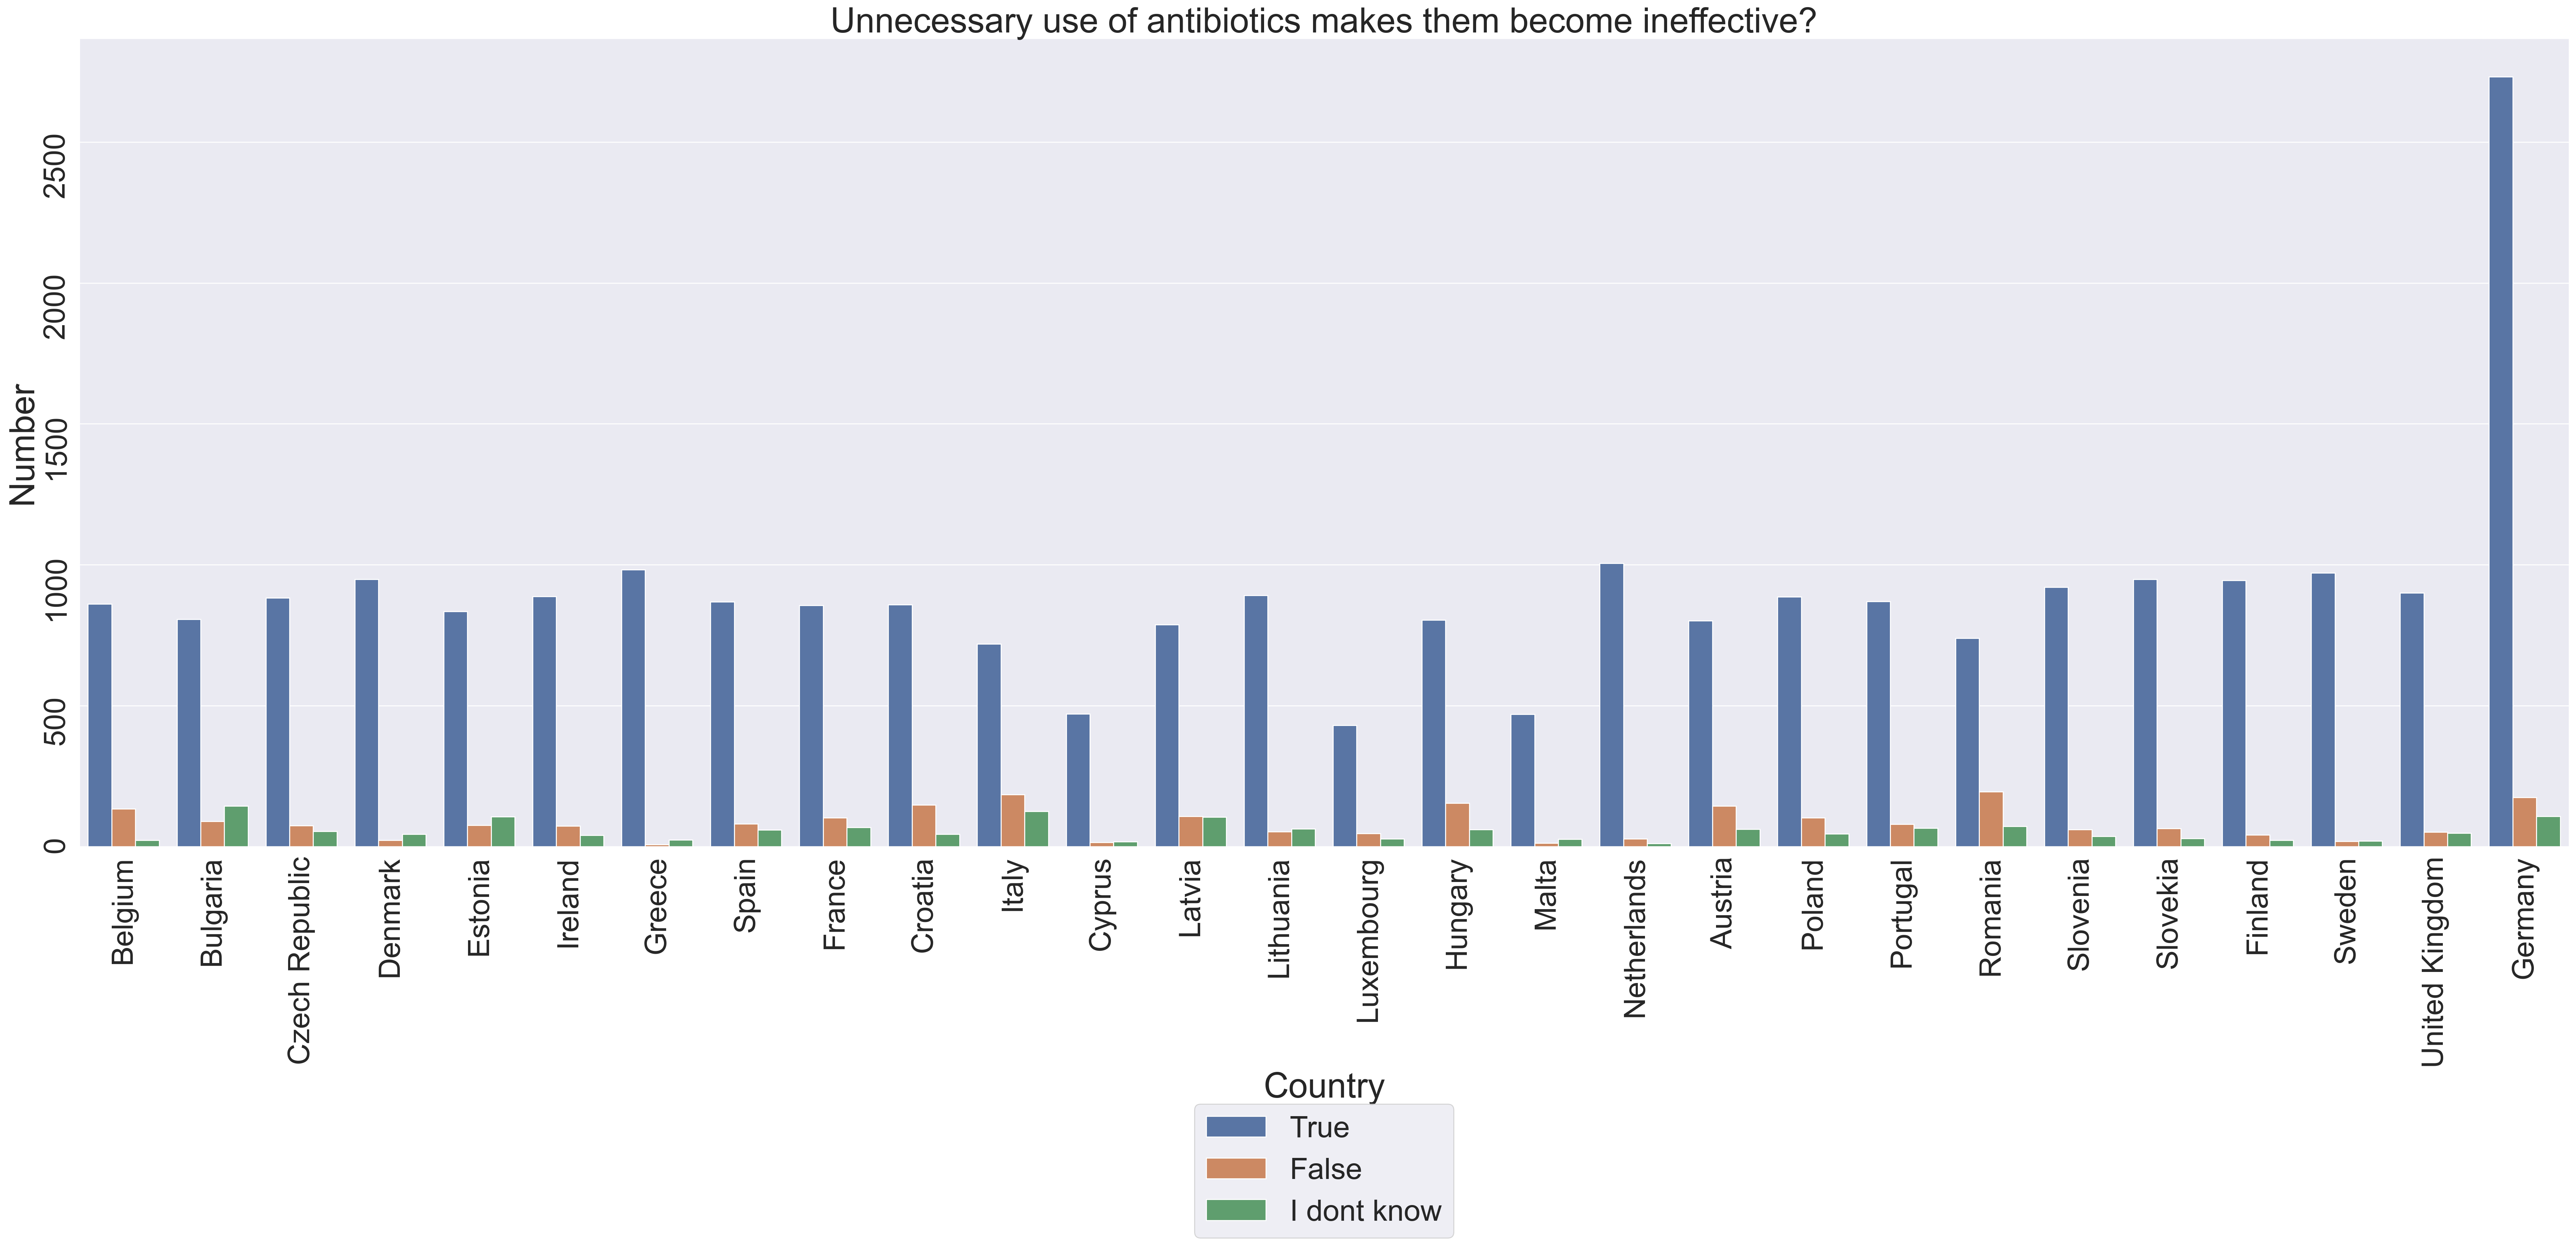

In [38]:
Question_5_3= Question_5_3.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_5_3.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 200)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_5_3)
ax.set_title("Unnecessary use of antibiotics makes them become ineffective?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

# QC6 When do you think you should stop taking antibiotics once you have begun a course of treatment?

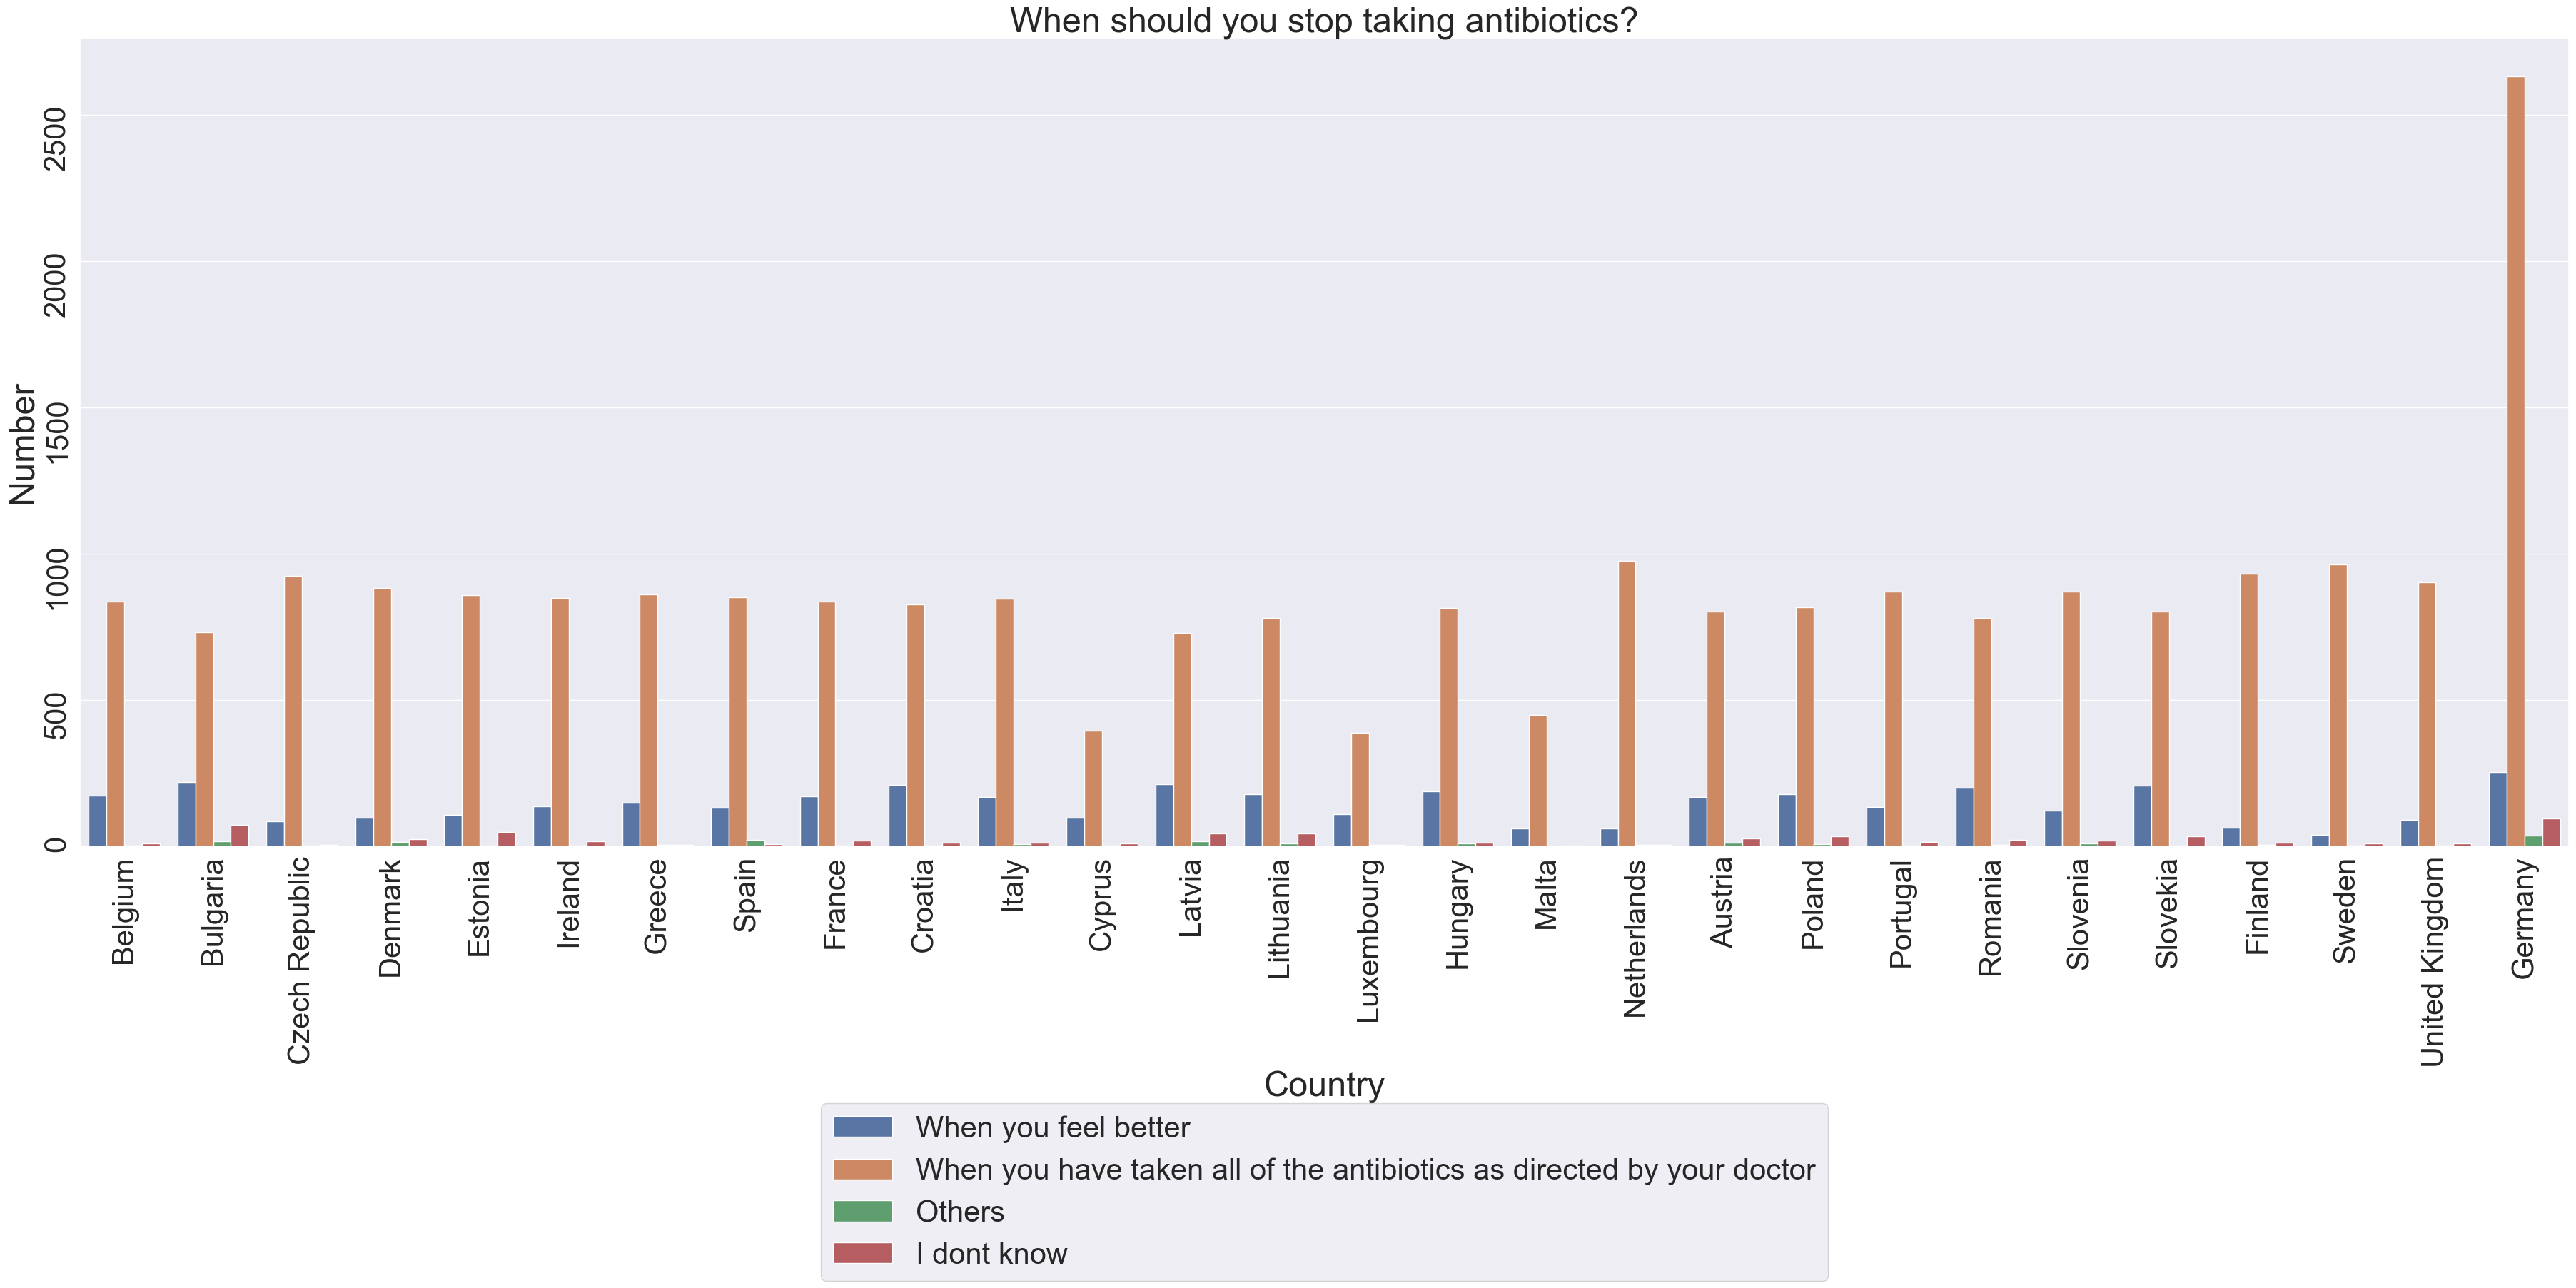

In [39]:
Question_6= Question_6.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_6.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_6)
ax.set_title("When should you stop taking antibiotics?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")

# QC8 Where did you get this information about not taking antibiotics unnecessarily?

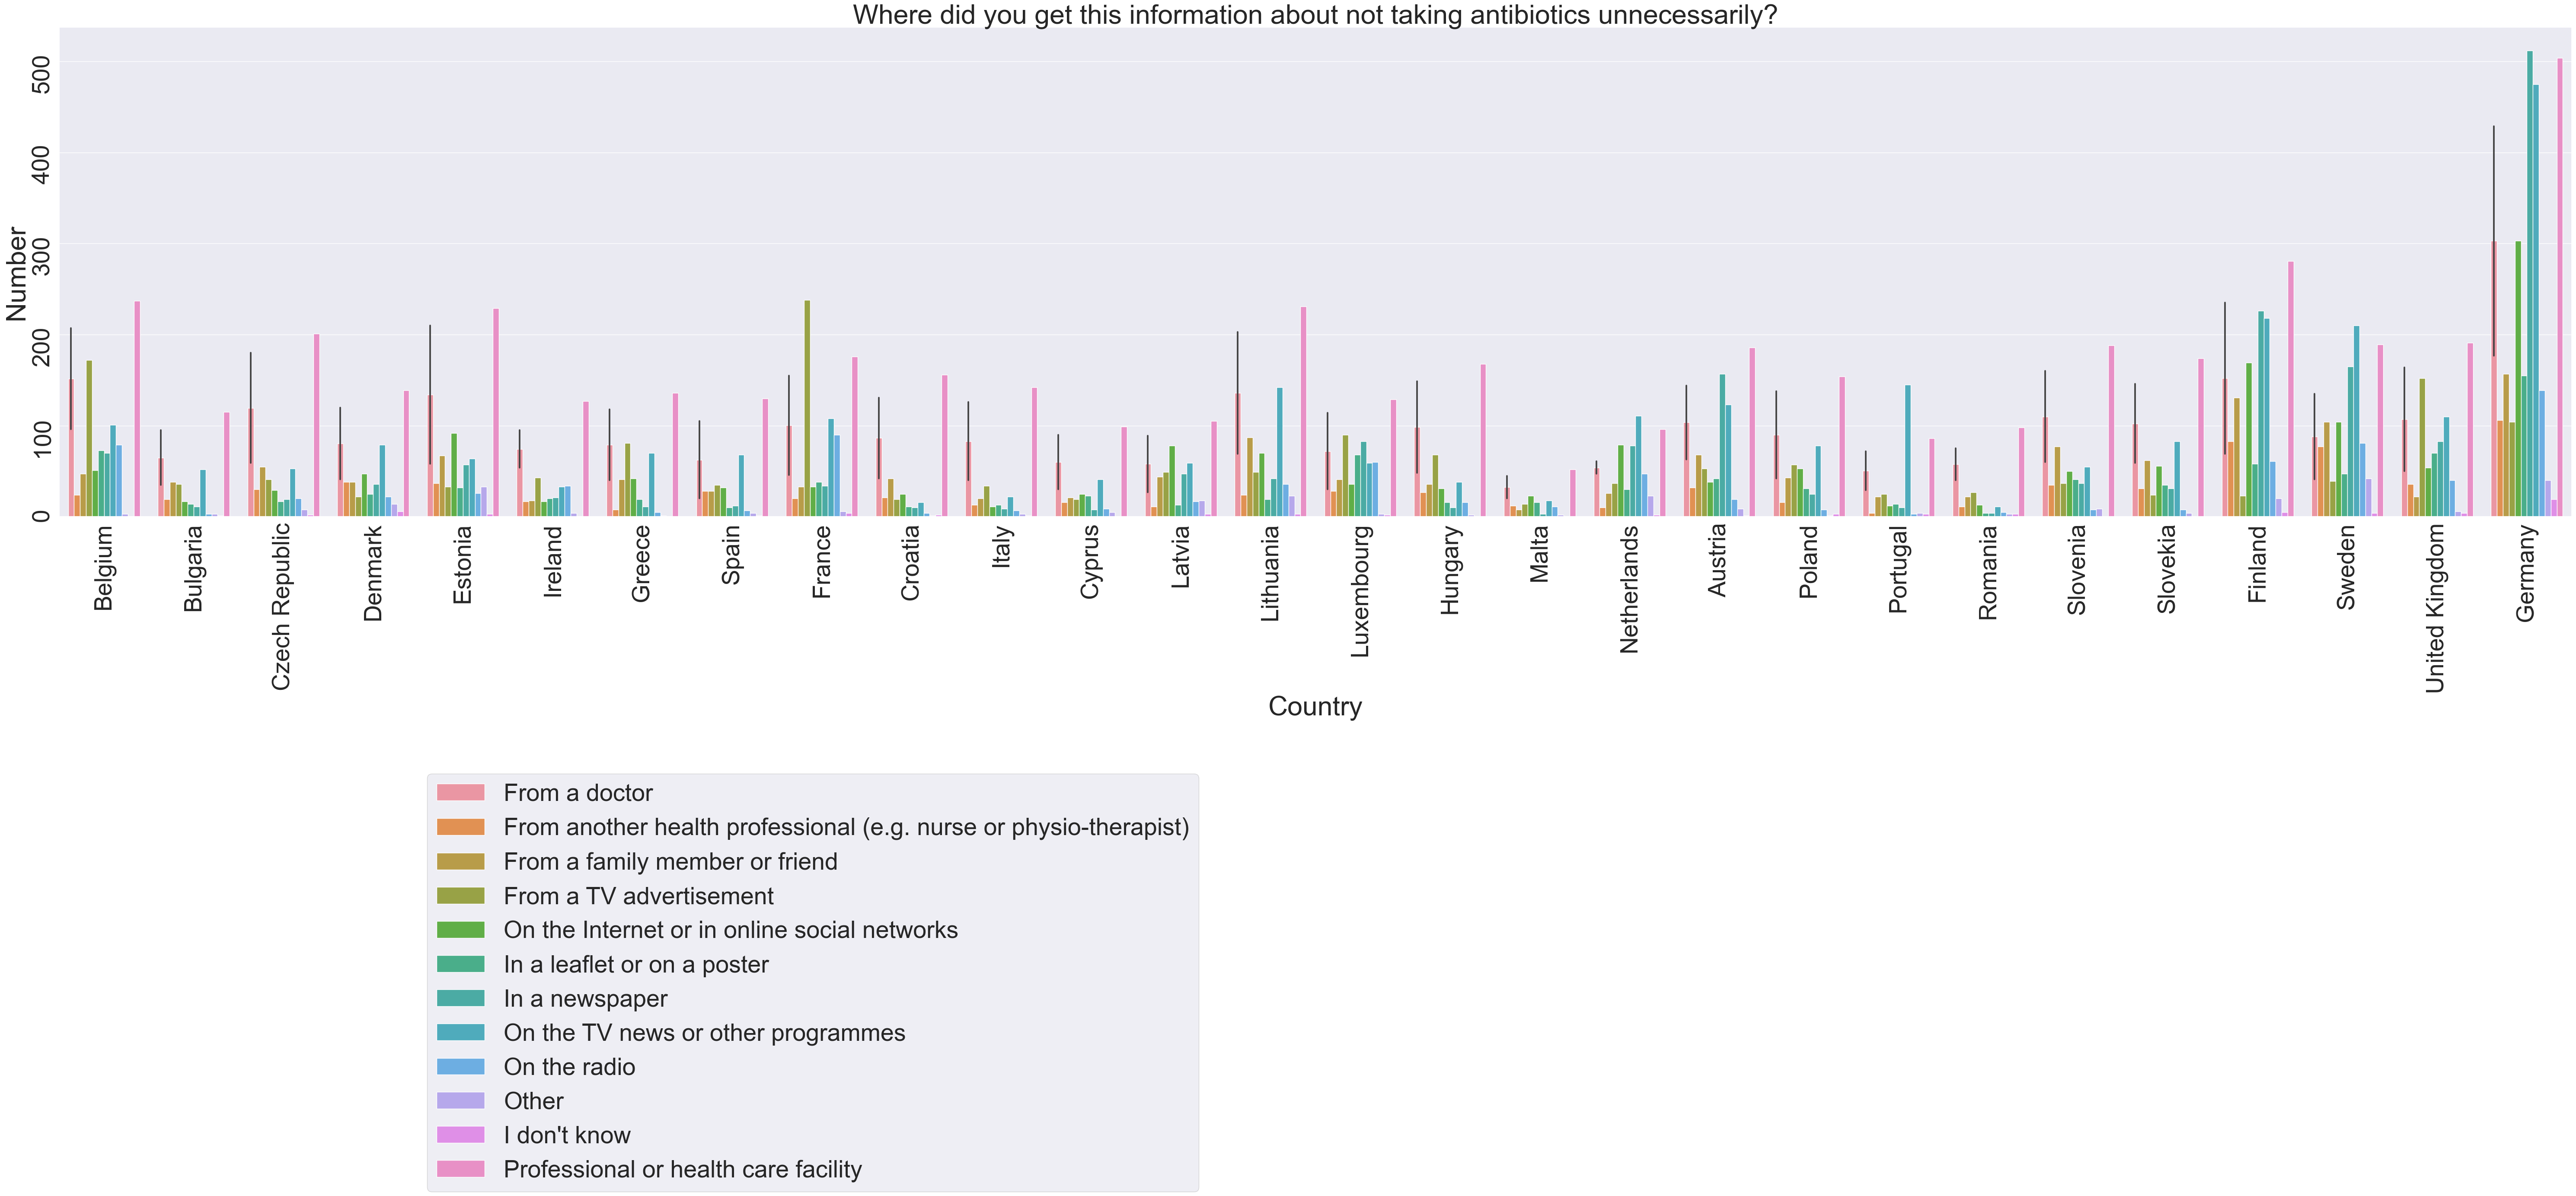

In [40]:
Question_8= Question_8.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_8.head()
fig, ax =plt.subplots(figsize= (75,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_8)
ax.set_title("Where did you get this information about not taking antibiotics unnecessarily?", fontdict = {"fontsize":45})
ax.set_xlabel("Country", fontsize = 45)
ax.set_ylabel("Number", fontsize = 45)
ax.tick_params( labelsize = 40, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.3, -0.5),fontsize = 40)
ax.grid(linewidth= 4, which = "minor")

# QC12 Which of the following sources of information would you use in order to get trustworthy information on antibiotics?

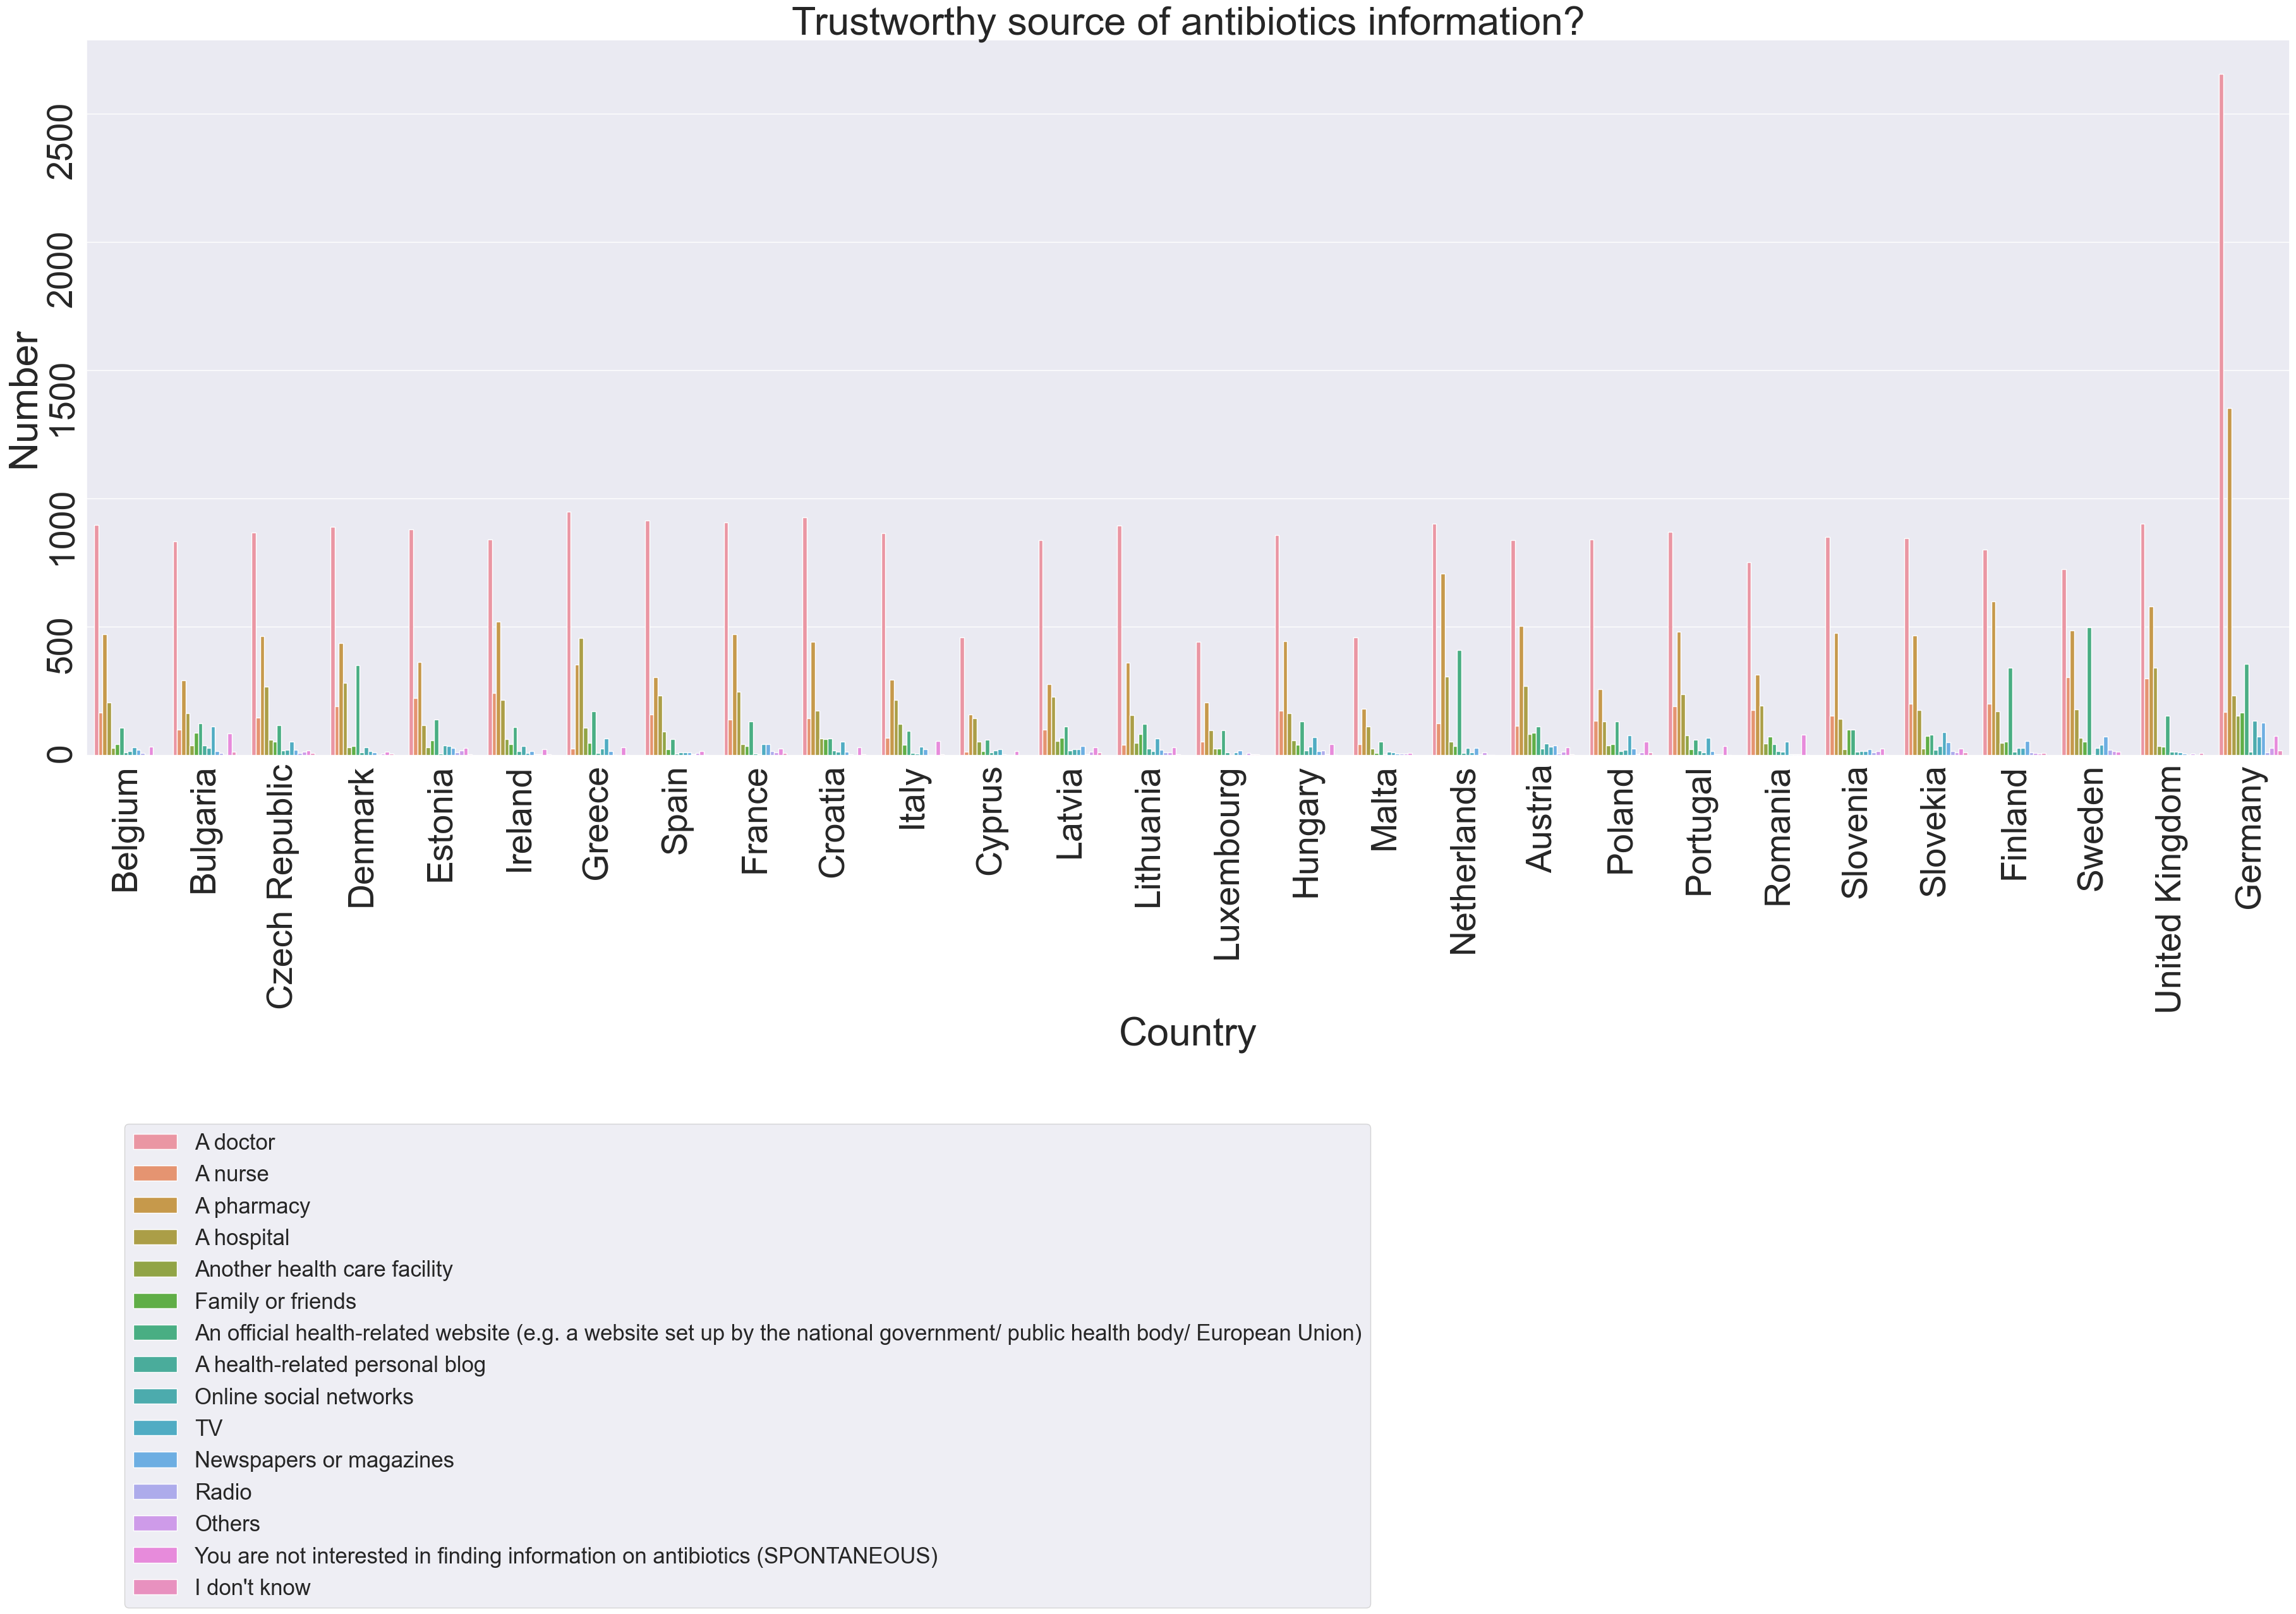

In [41]:
Question_12= Question_12.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_12.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 100)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_12)
ax.set_title("Trustworthy source of antibiotics information?", fontdict = {"fontsize":45})
ax.set_xlabel("Country", fontsize = 45)
ax.set_ylabel("Number", fontsize = 45)
ax.tick_params( labelsize = 40, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.3, -0.5),fontsize = 25)
ax.grid(linewidth= 4, which = "minor")

# QC15 Did you know that using antibiotics to stimulate growth in farm animals is banned within the EU?

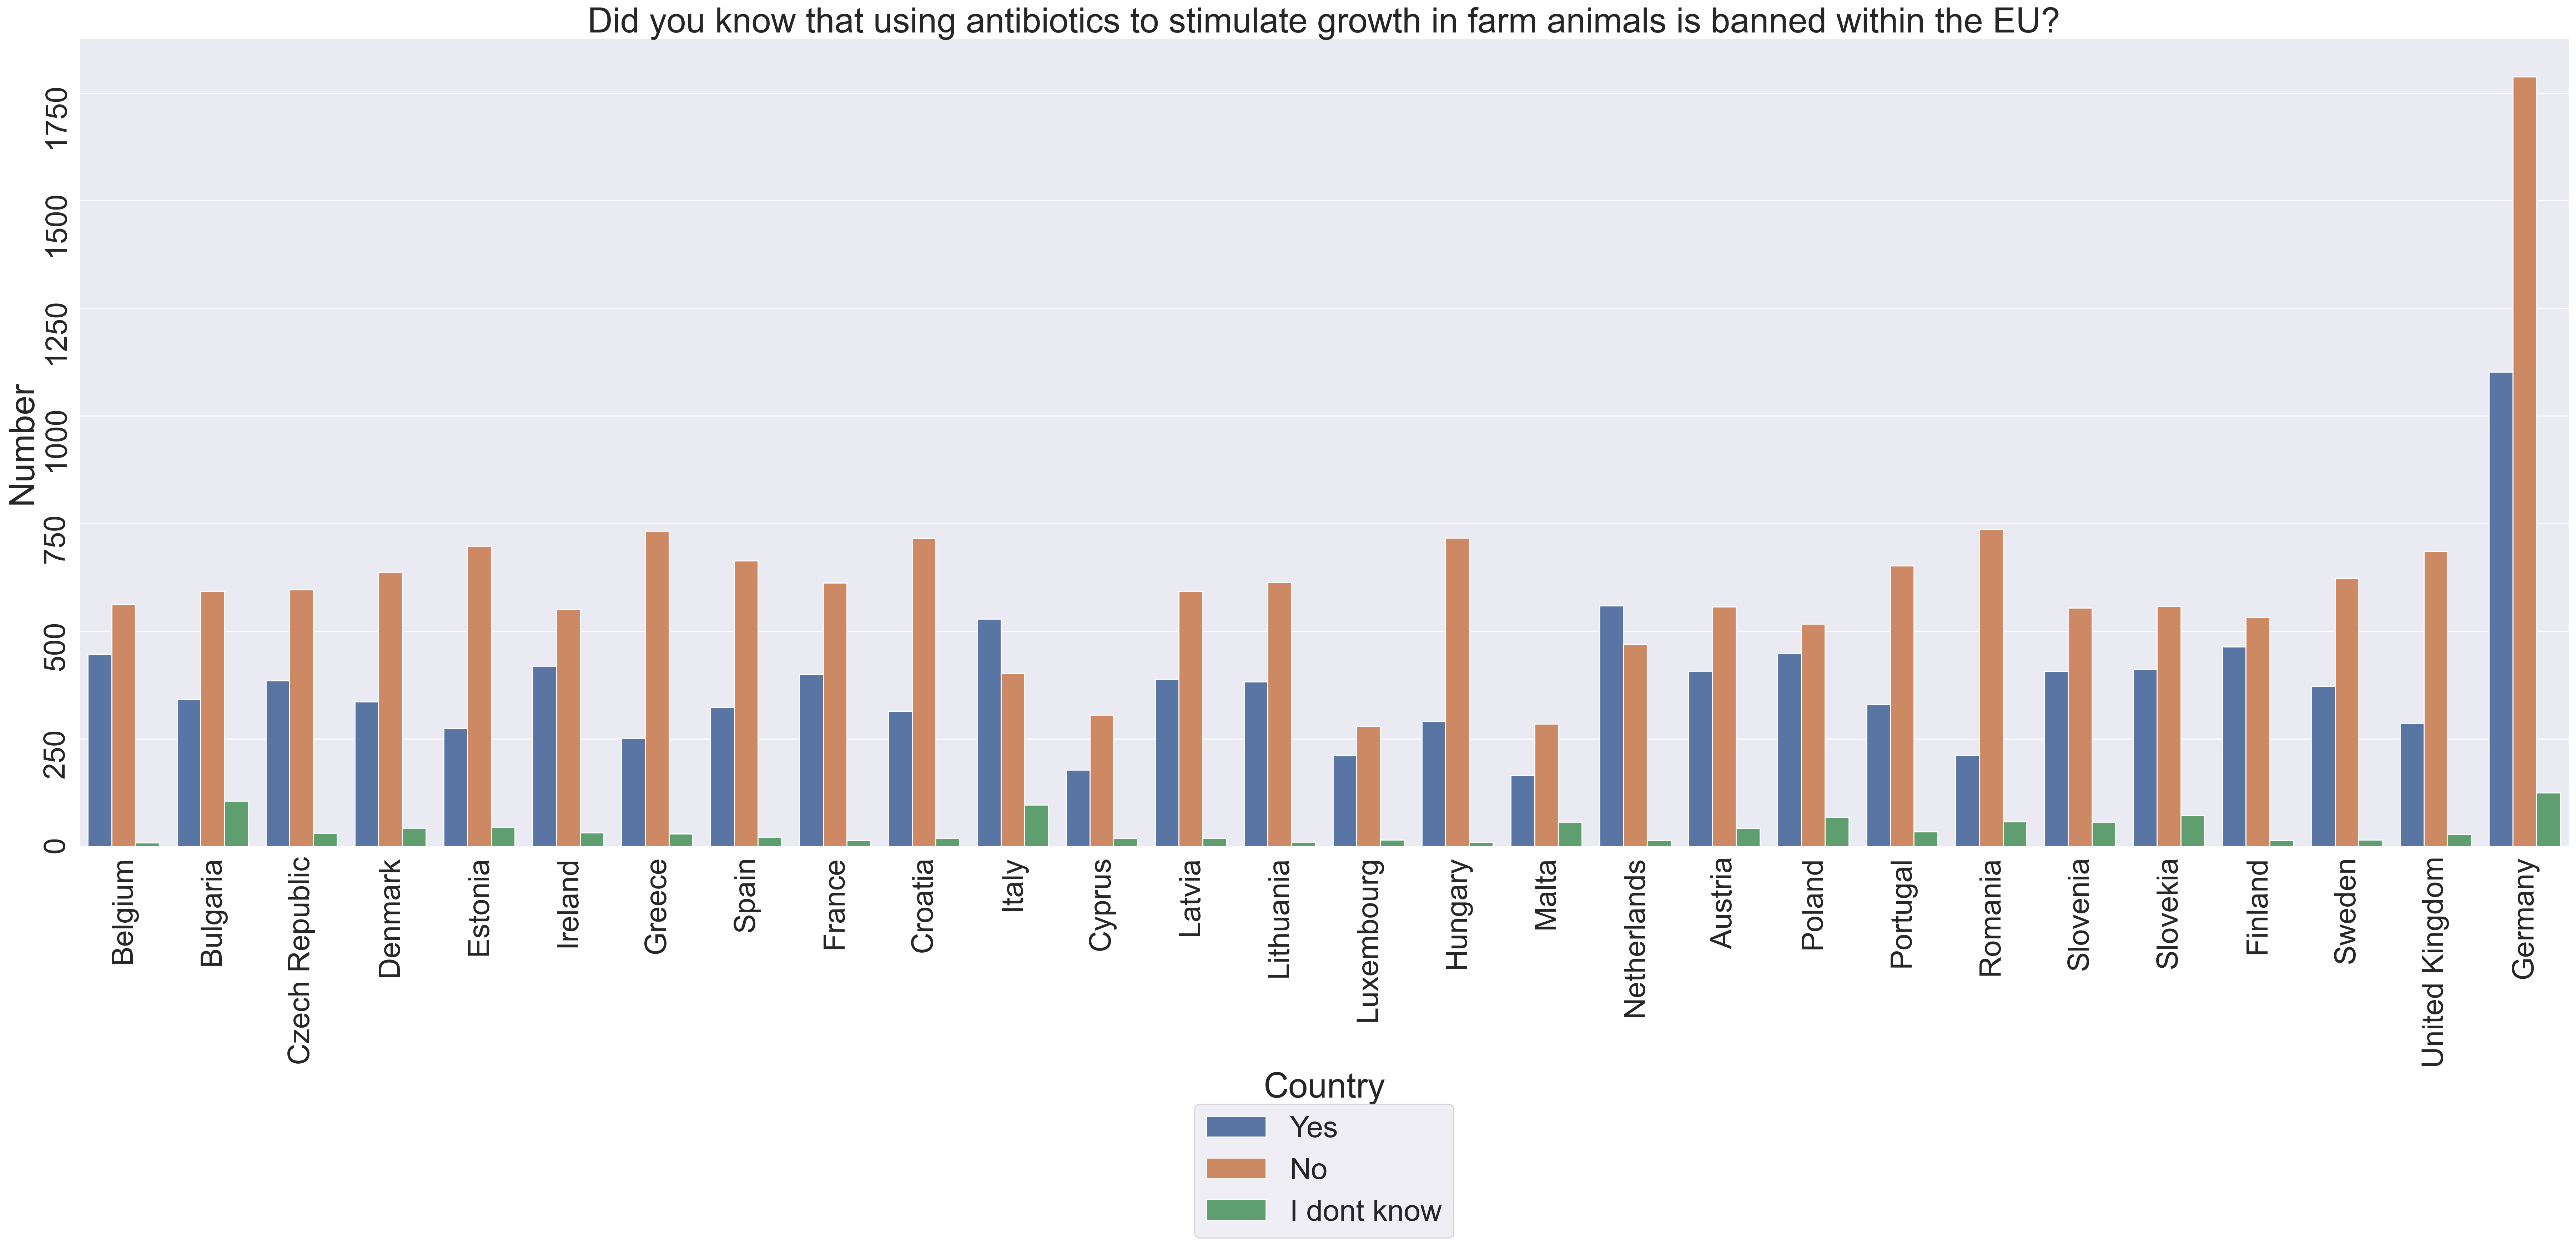

In [42]:
Question_15= Question_15.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_15.head()
fig, ax =plt.subplots(figsize= (45,15), dpi = 200)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_15)
ax.set_title("Did you know that using antibiotics to stimulate growth in farm animals is banned within the EU?", fontdict = {"fontsize":35})
ax.set_xlabel("Country", fontsize = 35)
ax.set_ylabel("Number", fontsize = 35)
ax.tick_params( labelsize = 30, rotation = 90)
ax.legend( loc= "upper center", bbox_to_anchor=(0.5, -0.3),fontsize = 30)
ax.grid(linewidth= 4, which = "minor")